## Brief Overview :

- Dataset Used : “Personal Loan Modeling”  which is available on Kaggle.

- There are 14 features (independent variables) and 1 target (dependent) variable for 5000 customers.

- Target variable (Personal_Loan) indicates whether customer accepted personal loan offered in the   last campaign or not.

- Problem Type : Binary classification problem as the target variable has two classes (1/0)


## Problem Statement 

To build a machine learning model which can predict:

- Whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.


### Data Dictionary:

ID: Customer ID

Age: Customer’s age in completed years

Experience: #years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Home Address ZIP code.

Family: the Family size of the customer

CCAvg: Avg. spending on credit cards per month (in thousand dollars)

Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

Mortgage: Value of house mortgage if any. (in thousand dollars)

Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

Securities_Account: Does the customer have securities account with the bank?

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Do customers use internet banking facilities?

CreditCard: Does the customer use a credit card issued by Universal Bank?

### Import Libraries

In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
sns.set()

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore")

## Load and Review Data

In [702]:
#import data into pandas using pd.read_csv()
import pandas as pd 
loan_df = pd.read_csv('Loan_Modelling.csv')
loan_df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Inspecting the dataframe

In [703]:
#Using describe on loan_df
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


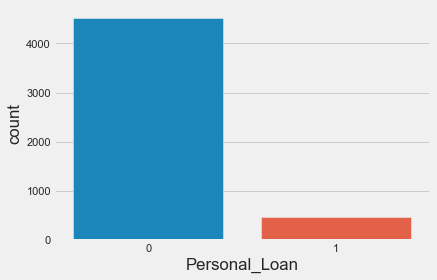

In [704]:
#Visualizing target variable(Personal_Loan)
loan_df['Personal_Loan'].value_counts()
plt.style.use("fivethirtyeight")
sns.countplot(loan_df['Personal_Loan'],data=loan_df);

In [705]:
#Checking the shape of dataframe
loan_df.shape

(5000, 14)

In [706]:
#Separating out categorical and continous variables :
columns = loan_df.columns
categorical_variables = []
continuous_variables=[]

for col in columns:
    if loan_df[col].value_counts().shape[0] <=5:
        categorical_variables.append(col)
    else :
        continuous_variables.append(col)
        
print("Categorical variables are :",categorical_variables)
print("Continous variables are :",continuous_variables)

Categorical variables are : ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
Continous variables are : ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


In [707]:
#Removing Personal_Loan and Id from categorical and continous variable list
categorical_variables.remove("Personal_Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


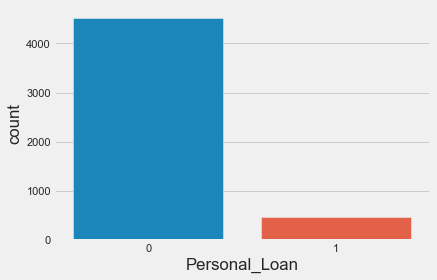

In [708]:
#Visualizing target variable(Personal_Loan)
loan_df['Personal_Loan'].value_counts()
plt.style.use("fivethirtyeight")
sns.countplot(loan_df['Personal_Loan'],data=loan_df);



- Target variable has imbalanced class distribution. Negative class (Personal_Loan=0) is much high than positive class    (Personal_Loan=1).

- Imbalanced class distributions influence the performance of a machine learning model negatively.

- We will use upsampling or downsampling to overcome this issue.


## Exploratory Data Analysis

## Univariate Analysis of Continous Variables 

In [709]:
#Creating a function that will help us create boxplot and histograms for any input numerical variable
#This function takes the numrical column as input and returns the boxplots.

#Creating functionthat would return histogram and boxplots
def hist_boxplot(feature, figsize=(15,10), bins = None):
            plt.style.use("fivethirtyeight")
            f = plt.figure(figsize=(20,4))  
            f.add_subplot(1,2,1)    #Creating subplots (total number of rows,total number of columns and plot number)
            plt.hist(feature)    # For creating histogram
            f.add_subplot(1,2,2)    #Creating subplots (total number of rows,total number of columns and plot number)
            sns.boxplot(feature,showmeans=True)   # boxplot will be created and a traiangle will indicate the mean value of the column

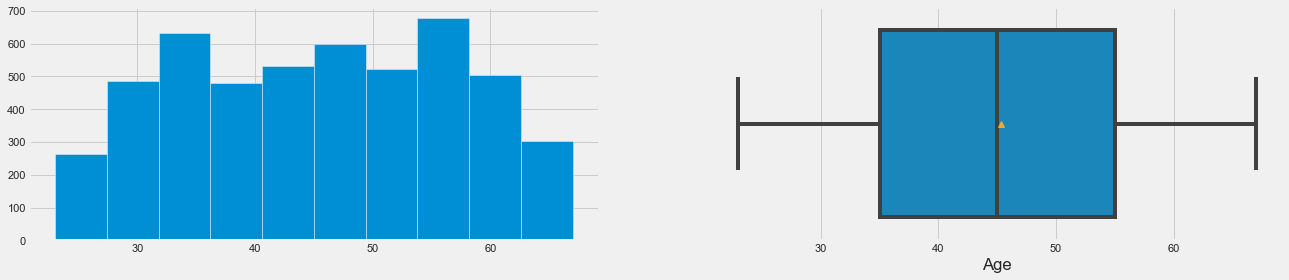

In [710]:
#importing libraries
import seaborn as sns
import numpy as np 
hist_boxplot(loan_df.Age,bins=25);  #calling function that would return histogram and boxplots

- Box plot and histogram both show that Age variable is normally distributed,with presence of no outliers.

- As Age variable is normally distributed  with majority of customers falling between 30 years and 60 years of age,both mean and median are equal and it could be verified from both box plot and histogram.

- Average age of customer in years is around 45.34 which can be checked from the above box plot and histogram. 


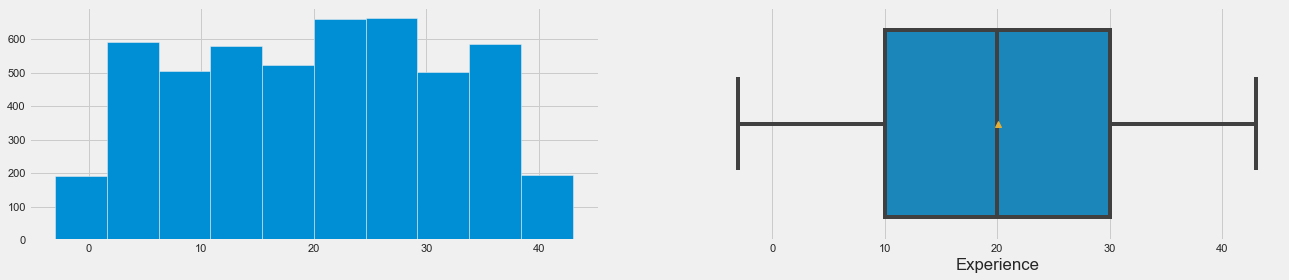

In [711]:
#importing libraries
import seaborn as sns
import numpy as np 
hist_boxplot(loan_df.Experience,bins=25);

- Box plot and histogram both show that Experience variable is normally distributed, with presence of no outliers.

- As experience variable is normally distributed,both mean and median are equal and it could be verified from both box plot and histogram.

- Average experience customers has in years is around 20years.Experience variable has some negative value, which should be fixed.

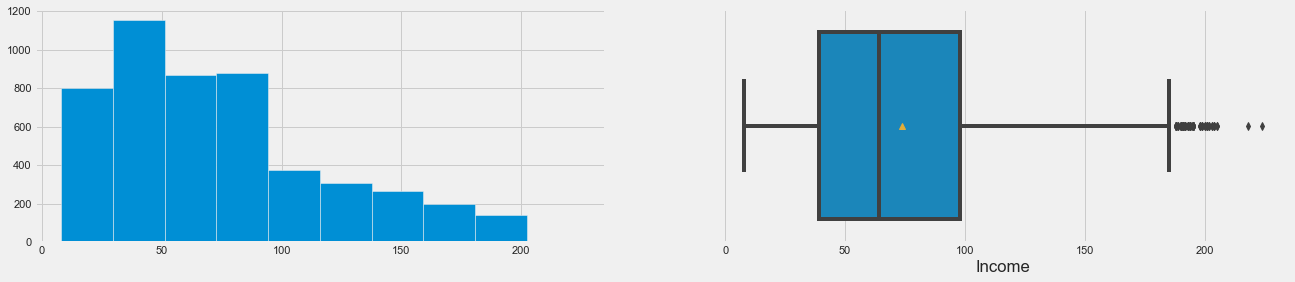

In [712]:
#importing librariesimport seaborn as sns
import numpy as np 
hist_boxplot(loan_df.Income,bins=25); #calling function that would return histogram and boxplots

- Box plot and histogram both show that majority of customers has income ranging from 40K to 55K
- We can also infer that Income is right skewed as most of the data is piled on the left with its tail on the right,
 which could be verified from the box plot too as the longer part of the box is to the right or above the median.

- As the data is right skewed,Income mean which is around(73.77) is higher than the  income median of around(64).
- Many outliers can be seen.

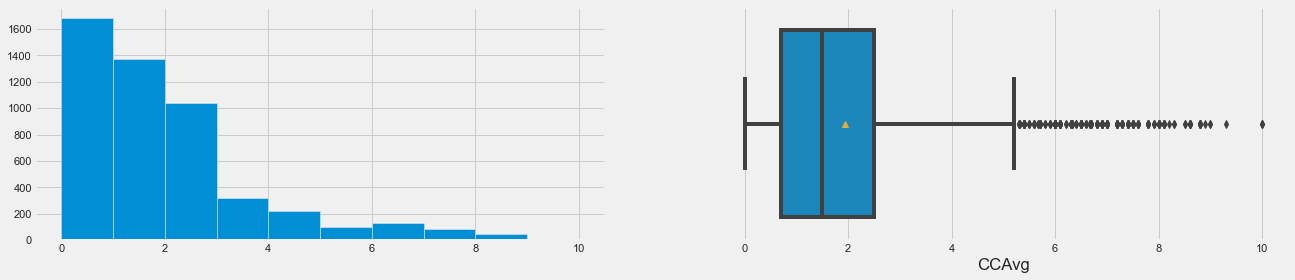

In [713]:
#importing libraries
import seaborn as sns
import numpy as np 
hist_boxplot(loan_df.CCAvg,bins=25);  #calling function that would return histogram and boxplots

- Box plot and histogram both show that average spending on credit cards per month is around 1.93(in thousand dollars) 
- CCAvg is right skewed as most of the data is piled on the left with its tail on the right,which could be 
  verified from the box plot too as the longer part of the box is to the right or above the median.

- As the data is right skewed,Cg mean(1.93) is higher than the median(1.50).

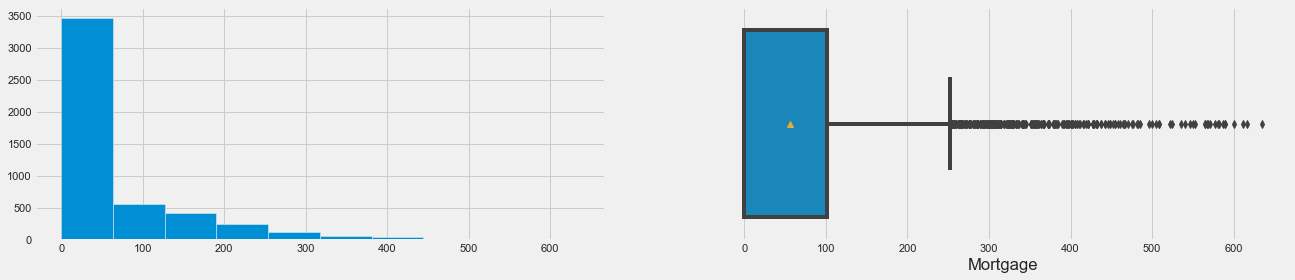

In [714]:
hist_boxplot(loan_df.Mortgage,bins=25);  #calling function that would return histogram and boxplots

- Mortgage contains most of the values as zero.
- Mortgage contains outliers.

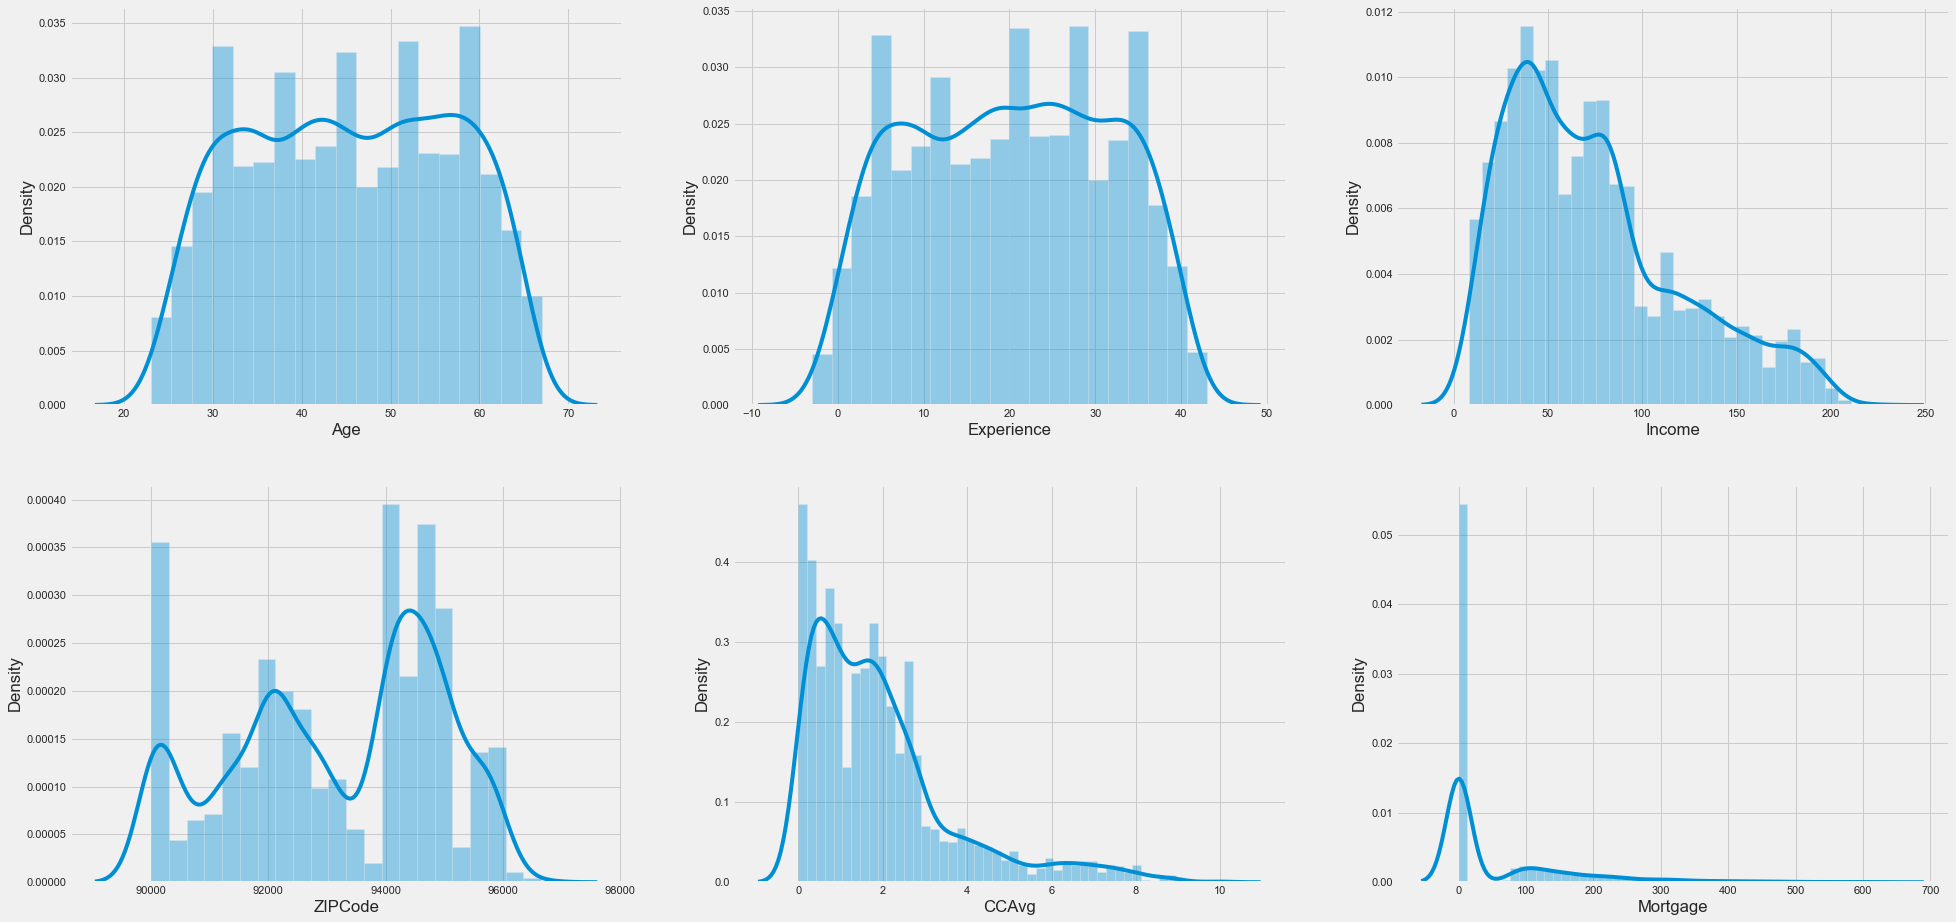

In [715]:
plt.style.use("fivethirtyeight")
fig=plt.figure(figsize=(30,15))
#Looping through all thecontinous variables
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)  #for creating subplots (2=number of rows,3=number of columns,i+1 = number of plots)
    sns.distplot(loan_df[col])   #for creating distplots

- Age and Experience are uniformaly distributed, need to fix experience as it has -ve values which is not correct

- Income and CCAvg are right skewed

- Zipcode is normally distributed

- Most of the customers have not taken motgages.


### Univariate Analysis for Categorical

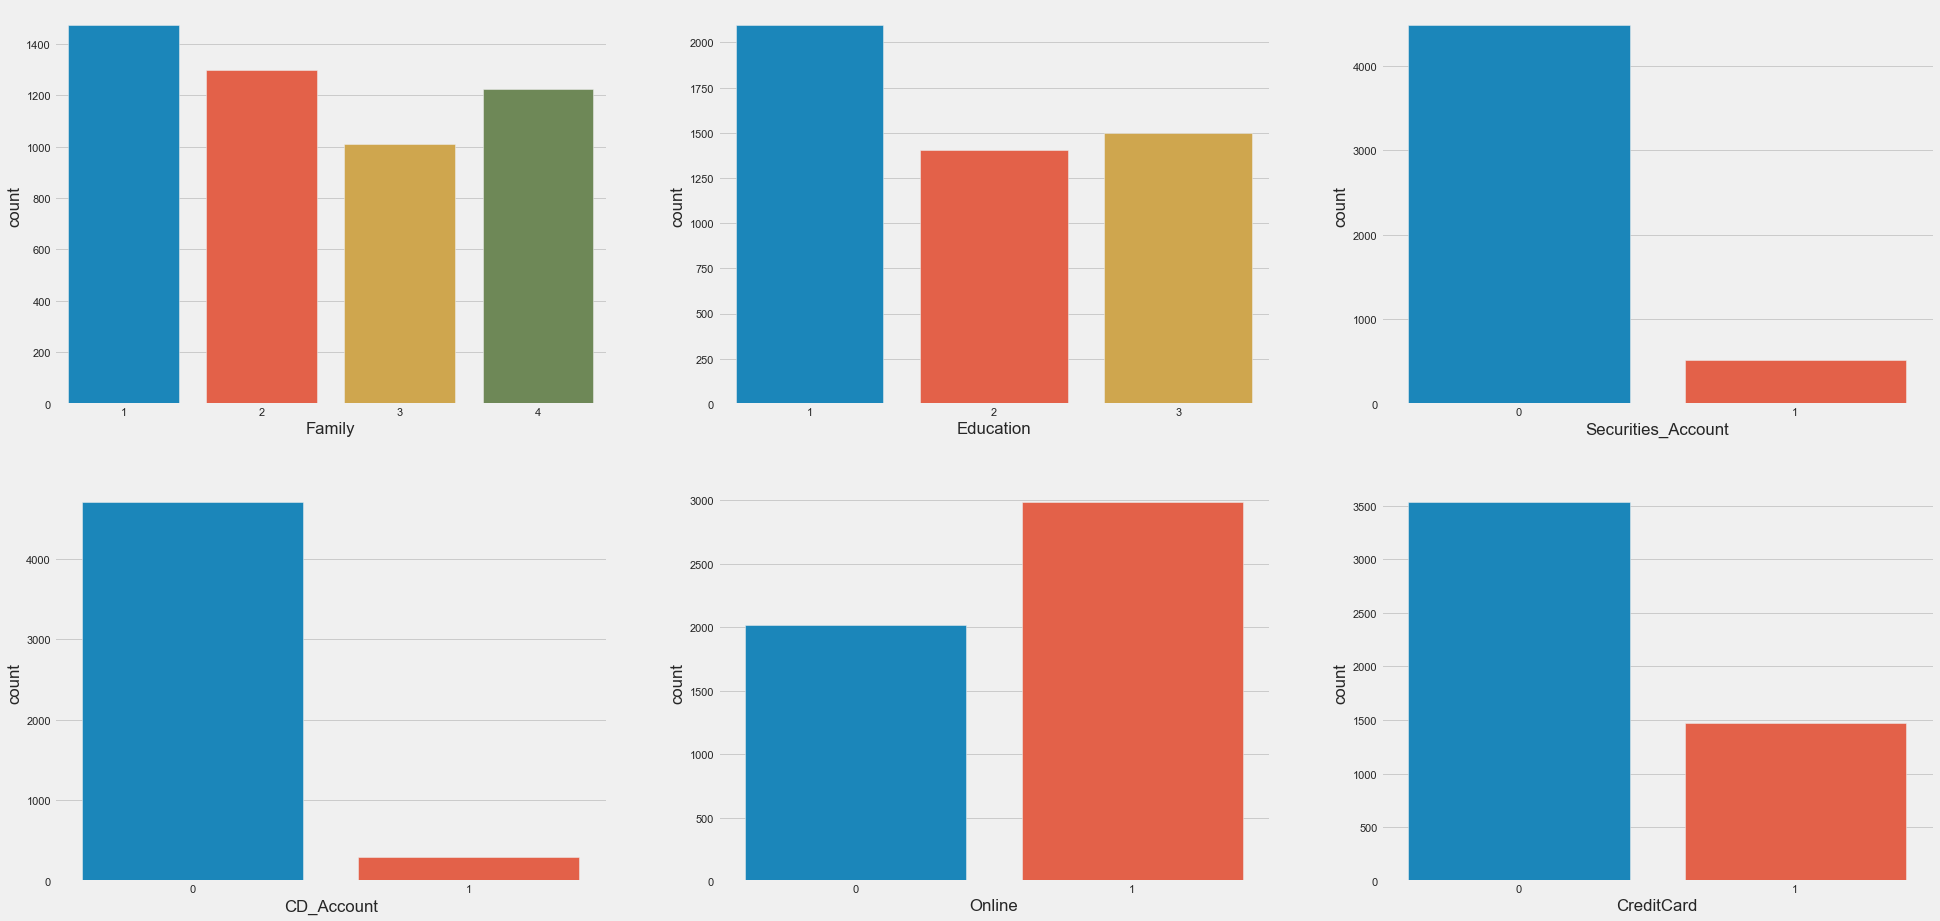

In [716]:
plt.style.use("fivethirtyeight")
fig=plt.figure(figsize=(30,15))
#Looping through all thecontinous variables
for x,col in enumerate(categorical_variables): 
    ax=fig.add_subplot(2,3,x+1)   #for creating subplots (2=number of rows,3=number of columns,x+1=number of plots)
    sns.countplot(loan_df[col])    #for creating counplot

### Observations :

- Family size for most of the customers is 1  
- Education level for most of the customers is Undergraduate
- Most of the customer don't have CD_Account, Credit Card and Securities_Account
- Customers are interested in using Online banking

### Bivariate Analysis

- Analysing each column (Independent Attribute) first with Personal Loan(Dependent attribute) 
and then relating them with one another for finding patterns in data

### Continous Variables


#### Age Vs Personal Loan

<AxesSubplot:xlabel='Personal_Loan', ylabel='Age'>

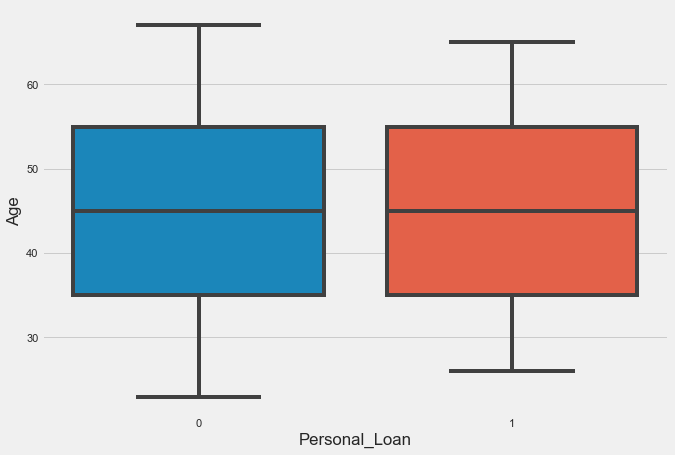

In [717]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='Age',data=loan_df)



- Personal Loan doesn't show variations with Age.




#### Experience VS Personal Loan

<AxesSubplot:xlabel='Personal_Loan', ylabel='Experience'>

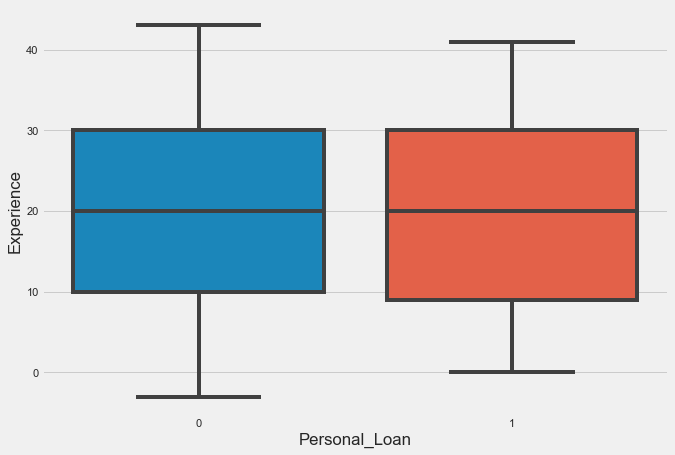

In [718]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='Experience',data=loan_df)

- Personal Loan doesn't show much variations with Experience.


#### Income Vs Personal Loan

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

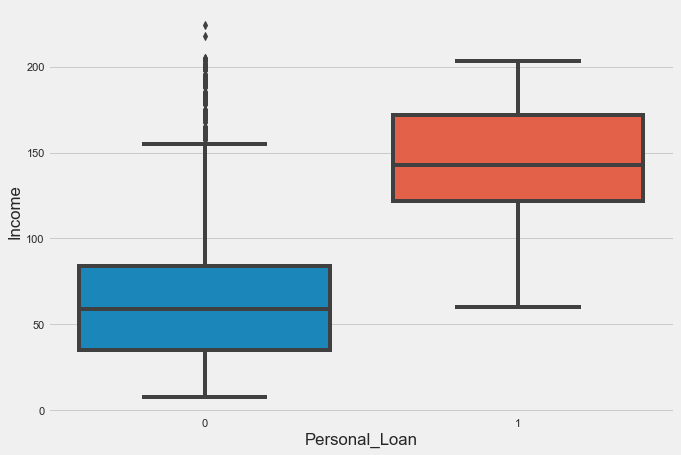

In [719]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='Income',data=loan_df)

- Income variable seems to have good effect on Personal_Loan.
- As income level of customers is increasing ,they are more interested in taking loan.






#### Personal Loan Vs CC Avg

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

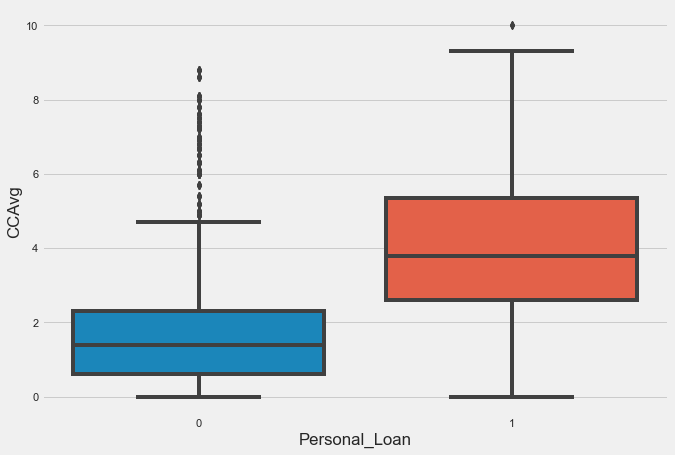

In [720]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='CCAvg',data=loan_df)

- CCAvg show good relationship with Personal Loan.
- Customer who has more spending on Credit cards has more chances to have personal loan


#### Personal Loan Vs Mortgage

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

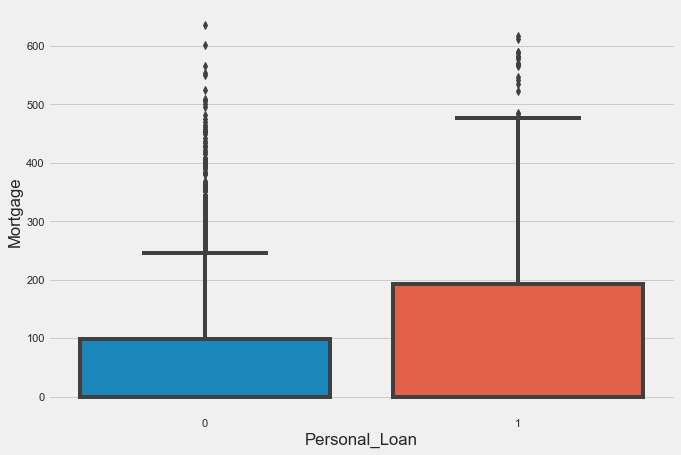

In [721]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='Mortgage',data=loan_df)

- Customer with more mortgages has high chance of having personal loan





### Categorical Variable

Checking categorical variables with target


#### Personal Loan Vs Family

<AxesSubplot:xlabel='Personal_Loan', ylabel='Family'>

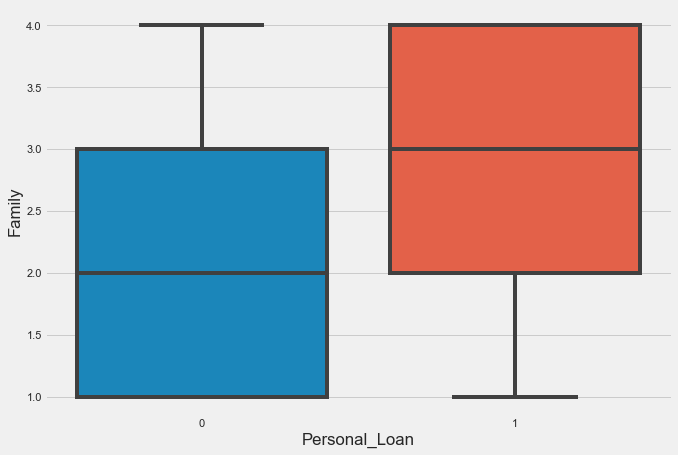

In [722]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='Family',data=loan_df)



- As the family size of customers is more than or equal to 3, they are having better chances of availing personal loan.  



#### Personal loan Vs Education

<AxesSubplot:xlabel='Personal_Loan', ylabel='Education'>

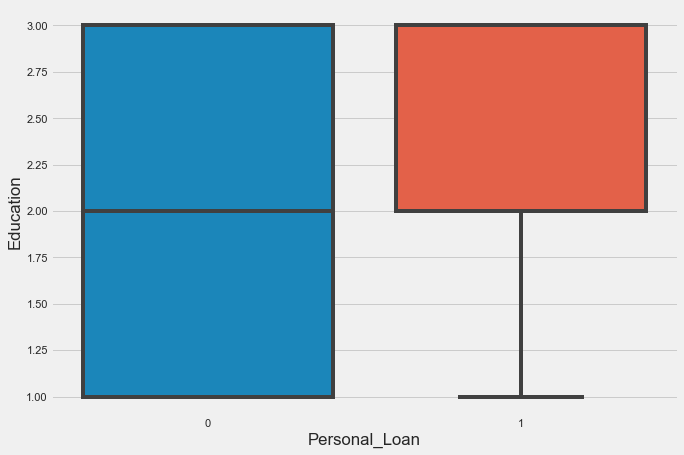

In [723]:

plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,7))
sns.boxplot(x='Personal_Loan',y='Education',data=loan_df)


- Customer with higher education levels, especially customer who are Graduate or Advanced professionals have more chances 
  of taking personal loan.

In [724]:
#### Personal Loan Vs Securities Account

<AxesSubplot:xlabel='Securities_Account', ylabel='Personal_Loan'>

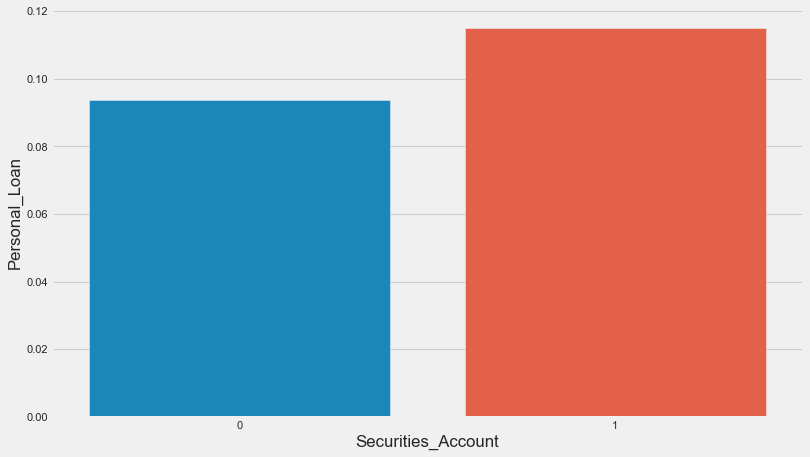

In [725]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.barplot(x='Securities_Account',y='Personal_Loan',data=loan_df,ci=None)

- Customer with Securities account has high chance of having personal loan in comparison to customer with no securities account

In [726]:
#### Personal Loan Vs CD Account

<AxesSubplot:xlabel='CD_Account', ylabel='Personal_Loan'>

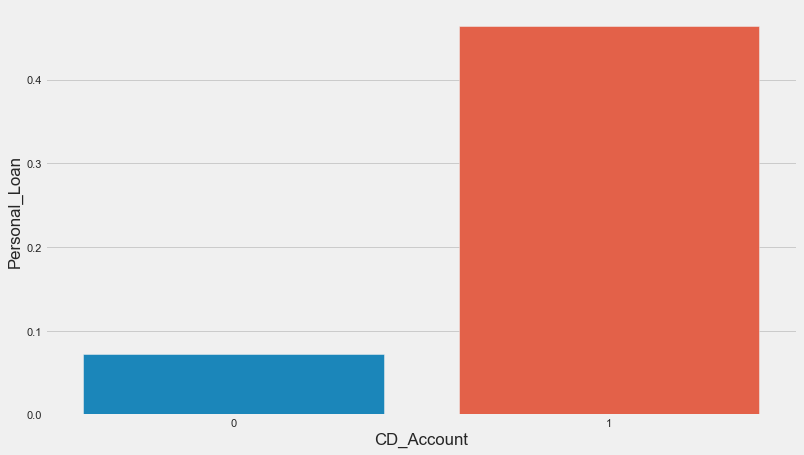

In [727]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.barplot(x='CD_Account',y='Personal_Loan',data=loan_df,ci=None)




- Customer with CD account has high chance of having personal loan in comparison to customer with no CD  account

#### Personal Loan Vs Online Banking

<AxesSubplot:xlabel='Online', ylabel='Personal_Loan'>

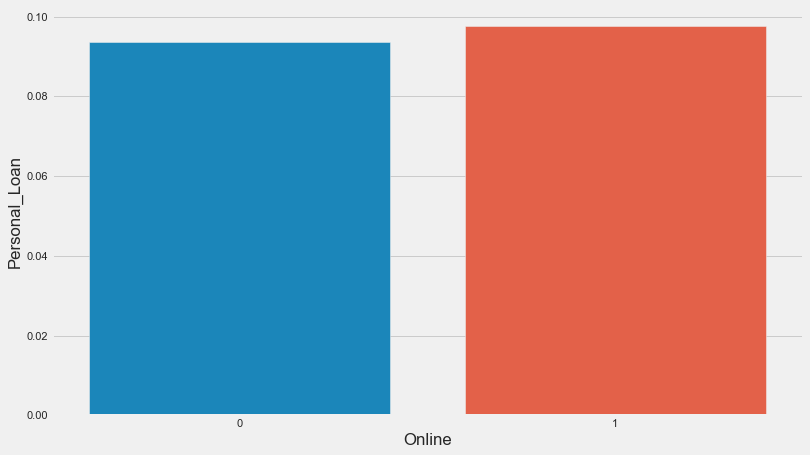

In [728]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.barplot(x='Online',y='Personal_Loan',data=loan_df,ci=None)



- Customers using online banking or not doesn't have much impact on chances of customer having personal loan



#### Personal Loan Vs Credit Card

<AxesSubplot:xlabel='CreditCard', ylabel='Personal_Loan'>

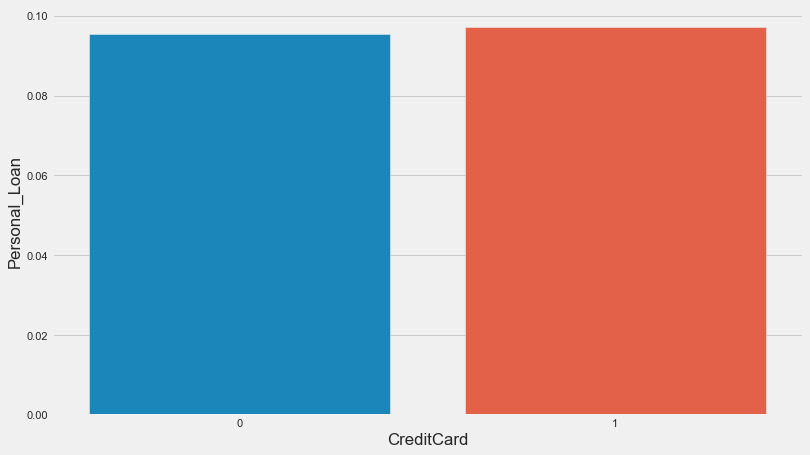

In [729]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.barplot(x='CreditCard',y='Personal_Loan',data=loan_df,ci=None)

- Customers having Credit card or not doesn't have much impact on chances of customer having personal loan

## Correlation using heat map

<AxesSubplot:title={'center':'Correlation'}>

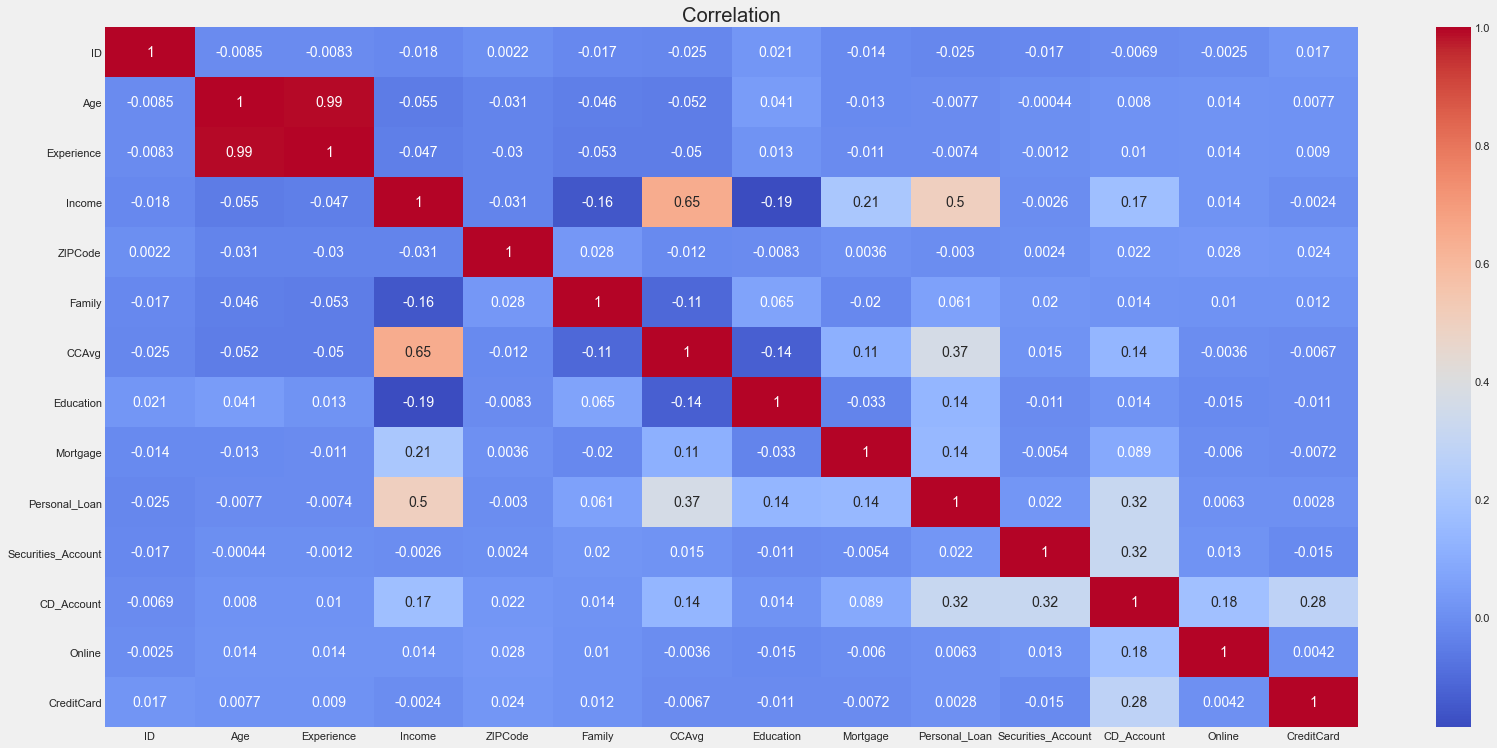

In [730]:
#Creating a correation dataframe to check the correlations between variables
corr=loan_df.corr()
plt.figure(figsize=(25,12))
#Giving title to correlation matrix 
plt.title('Correlation')
#Plotting heatmap from sns library 
sns.heatmap(corr, annot=True,cmap='coolwarm')

Correlation matrix is used for understanding how much are independent 
variables are correlated with the target variable.

## Interpretation of Correlation Matrix :

On the right side of our correlation matrix we have a colorbar where the blue color represents the negative correlation .The darker the blue the stronger the negative correlation and in the middle section where the color is little light or almost grey depicts little or no correlation at all between variables whereas darker the red stronger the positive correlation.


## Our Analysis :

From our correlation matrix we can infer that:

- Personal_Loan has high correlation with Income, Credit card average spending(CCAvg) and CD_account
- In other variable we see high correlation between Age and experience of 0.99.These 2 variables can have multicollinearity.
  Multicollinearity is when 2 or more independent variables are highly related/correlated with each other.
- Income and CCAvg are highly correlated with each other at 0.65.This suggests that customers with higher income have higher      Credit card spendings
- Personal loan doesn't seems to have any major correlation with experience. Since Experience has some -ve enteries,we can look   at dropping Experience during data cleaning.
- Income and CCAvg have a positive correlation with Mortgage.

## Data Pre-processing/Manipulations 

##### Data Cleaning

In [731]:
#Checking for duplicate values 
loan_df.drop_duplicates(inplace=True)
loan_df.shape #Inspecting the shape again 

(5000, 14)

In [732]:
loan_df.head() #LOoking at the dataframe's head

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [733]:
#Using ID variable as index of Dataframe

#loan_df.set_index("ID",inplace=True)

In [734]:
# Dropping Zip code, as itdoes not have any significant impact on target variable Personal Loan
loan_df.drop('ZIPCode',axis=1,inplace=True)

### Checking  and Removing Outliers  

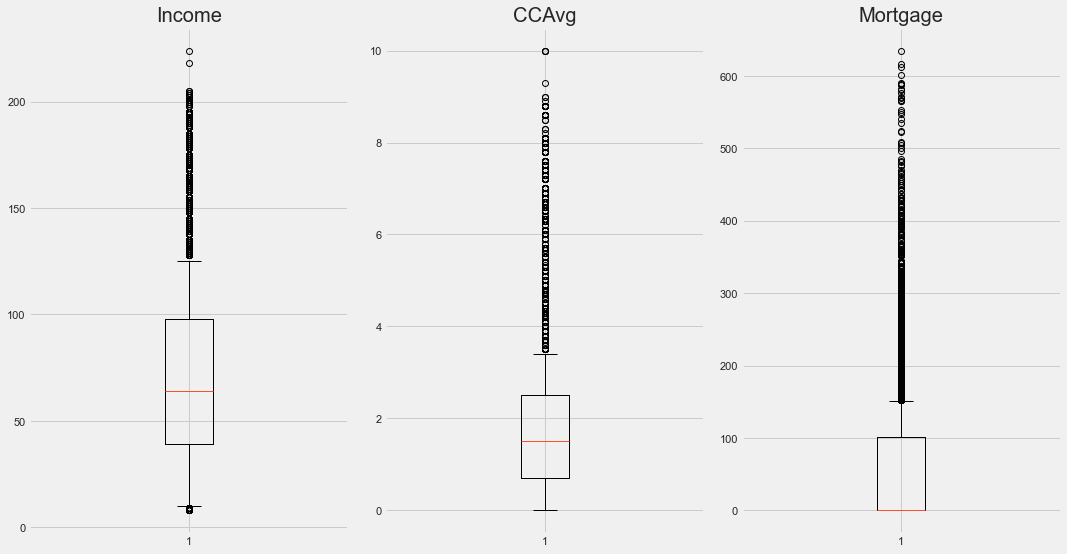

In [735]:
#Taking only those variables where we suspected outliers while performing EDA
numeric_columns =['Income','CCAvg','Mortgage']

# outlier detection using boxplot
plt.figure(figsize=(20,30))

#Looping through all numeric_columns
for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)  #creating subplots 
                     plt.boxplot(loan_df[variable],whis=0.5)  # creating boxplots
                     plt.tight_layout()
                     plt.title(variable)  #Putting title for all the plots

plt.show()

### Removing outliers

- For Income,Mortgage and CCAvg we can observe presence of many outliers.
- We will try to remove these outliers using IQR(InterQuartile Range)

In [736]:
#Creating outlier function that will return us the lowerbound and upperbound values.
def outlier_treatment(datacolumn):
        sorted(datacolumn)
        Q1,Q3 = np.percentile(datacolumn , [25,75]) 
        IQR = (Q3-Q1)
        lower_range = Q1-(1.5 * IQR) 
        upper_range = Q3 +(1.5 * IQR)
        return lower_range,upper_range

In [737]:
#Calling the outlier_treatment function and passing the variable from which we want to remove outliers
lowerbound,upperbound =outlier_treatment(loan_df['Income'])
lowerbound,upperbound

(-49.5, 186.5)

In [738]:
loan_df =loan_df[(loan_df['Income'] > lowerbound)  & (loan_df['Income'] < upperbound)]
loan_df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [739]:
lowerbound,upperbound =outlier_treatment(loan_df['CCAvg'])

In [740]:
loan_df =loan_df[(loan_df['CCAvg'] > lowerbound)  & (loan_df['CCAvg'] < upperbound)]
loan_df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [741]:
lowerbound,upperbound =outlier_treatment(loan_df['Mortgage'])

In [742]:
loan_df =loan_df[(loan_df['Mortgage'] > lowerbound)  & (loan_df['Mortgage'] < upperbound)]
loan_df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


### Feature Engineering

- Will create another Variable Bank_Services combining Online and Credit card Variable & check there correlation with Personal loan

In [743]:
 #Creating Bank_Services by combining Online and CreditCard
loan_df['Bank_Services']=loan_df['Online']+loan_df['CreditCard']

In [744]:
#Checking correlation of these variables with target 
loan_df[['Bank_Services','Online','CreditCard','Personal_Loan']].corr()

,Bank_Services,Online,CreditCard,Personal_Loan
Bank_Services,1.000000,0.732075,0.680811,-0.015472
Online,0.732075,1.000000,-0.000564,-0.015423
CreditCard,0.680811,-0.000564,1.000000,-0.006129
Personal_Loan,-0.015472,-0.015423,-0.006129,1.000000


In [745]:
#Dropping Online and 
loan_df.drop(['Online','CreditCard'],axis=1,inplace=True)

#checking the dataframe
loan_df.head() 

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Bank_Services
0,1,25,1,49,4,1.6,1,0,0,1,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1


In [746]:
#inspecting the shape after adding Bank_services variable
loan_df.shape

(4358, 12)

### Multicollinearity Check using VIF

In [747]:
#Importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining X and Y variables
X = loan_df.drop(['Personal_Loan'],axis=1)
y = loan_df[['Personal_Loan']]

#Importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking multicollinearity using VIF 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature        VIF
0                   ID   3.981859
1                  Age  89.187657
2           Experience  32.819205
3               Income   5.371658
4               Family   5.551920
5                CCAvg   3.867031
6            Education   6.800375
7             Mortgage   1.322058
8   Securities_Account   1.262221
9           CD_Account   1.318155
10       Bank_Services   3.065593


- Experience and Age have very high VIF value. This means that these two variables are highly   correlated.Before building our model we should drop one of these variables.

- We will keep that feature which has high corrleation with the target variable.So,I will be deleting Experience and will keep Age as Age would be more useful in predicting our target variable in comparision to Experience.

In [748]:
#Dropping Experience variable
#loan_df = loan_df.drop(['Experience'],axis=1)


##Checking the VIF value after removing Experience
#We can also notice that VIF value has decreased after removing Experience as it was highly correlated. 
X = loan_df[['Age','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Bank_Services']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0                 Age  8.949527
1              Income  4.873177
2              Family  4.553965
3               CCAvg  3.827605
4           Education  5.327867
5            Mortgage  1.306700
6  Securities_Account  1.252561
7          CD_Account  1.301455
8       Bank_Services  2.899346


In [749]:
loan_df.shape  #inspecting the dtaframe shape 

(4358, 12)

### Evaluation Metrics 

For this project we would be using Recall as our evaluation metrics as we would not like to miss customer who wanted
to take personal loan but was identified as not interested customer by the model.As a result, the potential customer 
would be missed by the salesteam.This would be a huge loss for the bank.
The whole purpose of the campaign was to target such customers.Hence, we would be focussing on Recall value 
for this problem statement.
Therefore, Recall should be maximized ,the greater the Recall higher the chances of
identifying both the classes correctly.

### Feature selection

- Feature selection means that we are selecting  a subset of the most relevant features (columns) for    a dataset.
- Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. 
- Some machine learning algorithms can be misled by irrelevant input features, resulting in worse 
  predictive performance.

Here we are selecting features using RFE (recursive feature elimination).

- Recursive feature elimination is basically a backward selection of the predictors. 
- This technique begins by building a model on the entire set of predictors and computing an
  importance score for each predictor. The least important predictor(s) are then removed, the model is   re-built, and importance scores are computed again.

In [750]:
# Defining X and Y variables
X = loan_df.drop(['Personal_Loan'],axis=1)
y = loan_df[['Personal_Loan']]

# Spliting X & Y varaibles into Train and Test
# Import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

#Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

##Initialize the LogisticRegression Classifier
lr = LogisticRegression()  

#Train the model using Training Dataset
lr_baseline_model = lr.fit(X_train,y_train)

#Importing RFE
from sklearn.feature_selection import RFE

##Initialize the RFE Classifier
rfe = RFE(estimator=lr, step=1)
rfe = rfe.fit(X_train, y_train)
rfe

#Creating DataFrame having Feature and Ranking as columns
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
#Sorting the values by Ranking 
selected_rfe_features.sort_values(by='Ranking')

Training set has 3050 samples.
Testing set has 1308 samples.


,Feature,Ranking
5,CCAvg,1
6,Education,1
8,Securities_Account,1
9,CD_Account,1
10,Bank_Services,1
1,Age,2
2,Experience,3
4,Family,4
3,Income,5
7,Mortgage,6


- RFE has ranked CCAvg,Education,Securities_Account,CD_Account and Bank_Services as the most important feature in predicting our taget variable.

### Modelling 

#### Creating function that will return scores of all performnce metrics

In [751]:
#Creating a function for returning scores of all performance metrics :
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
def generate_scores(model):
   
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    
    print("\nTrain Positive class Recall  : ",recall_score(y_train,y_pred_train))
    print("Test Positive class Recall  : ",recall_score(y_test,y_pred_test))
    print("Confusion matrix  Test :\n\n", confusion_matrix(y_test,y_pred_test))
    print("Confusion matrix Train  :\n\n", confusion_matrix(y_train,y_pred_train))
    print("Classification report Test :\n\n", classification_report(y_test,y_pred_test))
    print("Classification report Train  :\n\n", classification_report(y_train,y_pred_train))

#### Creating function that would return test confusion matrix 

In [752]:
#Creating function that would return test confusion matrix 
def get_confusion_matrix(y_actual,y_predict):
    cm = confusion_matrix(y_actual,y_predict)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
    plt.xlabel('predicted')
    plt.ylabel('truth')
    plt.show()

# Logistic Regression 

### LR_Model_1 (Without balancing the classes)

In [753]:
#Checking model's accuracy before taking class imbalance into consideration.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Defining independent(X) and dependent(y)variable
X = loan_df.drop(['Personal_Loan'],axis=1)
y = loan_df[['Personal_Loan']]


# Spliting X & Y varaibles into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3050, 11)
(1308, 11)
(3050, 1)
(1308, 1)


In [754]:
#importing libraries 
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score

##Initialize the LogisticRegression Classifier
logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

#Fit the model on train data 
logreg.fit(X_train,y_train)

#Predict on  test and train data 
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

#Calling score() to get the result of all evaluation metrics
generate_scores(logreg)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Train Positive class Recall  :  0.6129032258064516
Test Positive class Recall  :  0.575
Confusion matrix  Test :

 [[1210   18]
 [  34   46]]
Confusion matrix Train  :

 [[2842   22]
 [  72  114]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1228
           1       0.72      0.57      0.64        80

    accuracy                           0.96      1308
   macro avg       0.85      0.78      0.81      1308
weighted avg       0.96      0.96      0.96      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2864
           1       0.84      0.61      0.71       186

    accuracy                           0.97      3050
   macro avg       0.91      0.80      0.85      3050
weighted avg       0.97      0.97      0.97      3050



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


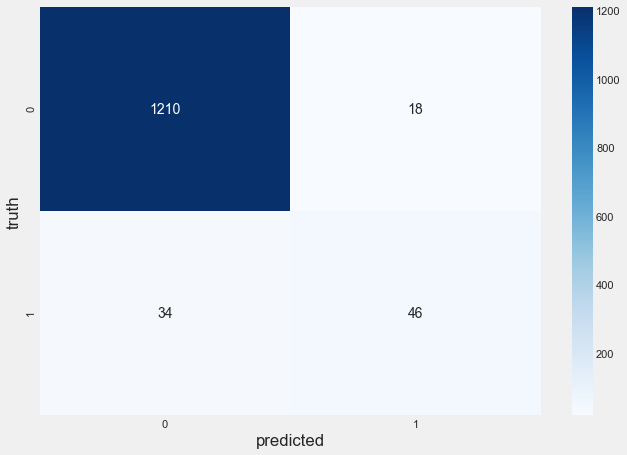

In [755]:
#Confusion matrix for test data
get_confusion_matrix(y_test,y_pred_test)

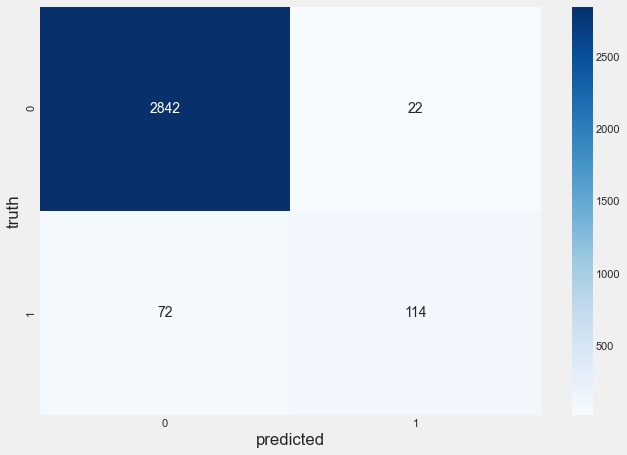

In [756]:
#Confusion matrix for train data
get_confusion_matrix(y_train,y_pred_train)

#### Interpretation of  test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. 
In the output, 1215 and 46  are actual predictions and 34 and 13 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan. 
- Model Prediction: The customer will take personal loan. 
- Outcome: The model is good.
- True Positive from our matrix :46

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. 
- Outcome: The business is unaffected.
- True Negative from our matrix :1215

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. 
- Outcome: The team which is targeting the potential customers would waste their resources on the customers who 
will not be buying a personal loan.
- False Positive from our matrix :13


False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. 
- Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. 
The purpose of campaign was to target such customers. 
- If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :34
    
We have to build a model which will be having low false negatives. 

In [757]:
#Evaluating Recall using cross_val_score
#Importing libraries
from sklearn.model_selection import cross_val_score

####Initialize the cross_val_score Classifier
logreg_scores = cross_val_score(logreg, X, y, cv=5,scoring="recall").mean()

print('Cross-Validation Recall Scores', logreg_scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross-Validation Recall Scores 0.5864430468204053


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


## LR_Model_2 ( HyperTuning + handling Class Imbalance )

In [764]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Defining independent(X) and dependent(y)variable
X = loan_df.drop(['Personal_Loan'],axis=1)
y = loan_df[['Personal_Loan']]


# Spliting X & Y varaibles into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Using StandardScaler for standardizing
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Using RandomOverSampler for balancing the classes in target variable 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

(3050, 11)
(1308, 11)
(3050, 1)
(1308, 1)


In [765]:
#Importing necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


###Initialize the LogisticRegression Classifier 
lr = LogisticRegression()

#Creating param grid
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty':['l1', 'l2', 'elasticnet'],'C': [100, 10, 1.0, 0.1, 0.01]}



#Using GridSearchCV to find the best combination of parameters
grid_search = RandomizedSearchCV(lr, param_grid,cv=5, return_train_score=True)

#Fitting the model 
grid_search.fit(X_resampled,y_resampled)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   return_train_score=True)

In [766]:
#Getting the best parameters
grid_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

In [761]:
#Getting the best score 
grid_search.best_score_

0.9249318304792824

In [767]:
#Importing necessary libraries
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score

#Creating LogisticRegression function and passing the parameters obtained using GridSearchCV
lr = LogisticRegression(solver='liblinear',penalty='l2',C=10,random_state=0)

#Fitting the model on balanced data
lr.fit(X_resampled,y_resampled)

#prediction on test set and training set 
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_resampled)


#Calling score() to get the result of all evaluation metrics
generate_scores(lr)


Train Positive class Recall  :  0.9301075268817204
Test Positive class Recall  :  0.9125
Confusion matrix  Test :

 [[1098  130]
 [   7   73]]
Confusion matrix Train  :

 [[2584  280]
 [  13  173]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1228
           1       0.36      0.91      0.52        80

    accuracy                           0.90      1308
   macro avg       0.68      0.90      0.73      1308
weighted avg       0.95      0.90      0.92      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       0.99      0.90      0.95      2864
           1       0.38      0.93      0.54       186

    accuracy                           0.90      3050
   macro avg       0.69      0.92      0.74      3050
weighted avg       0.96      0.90      0.92      3050



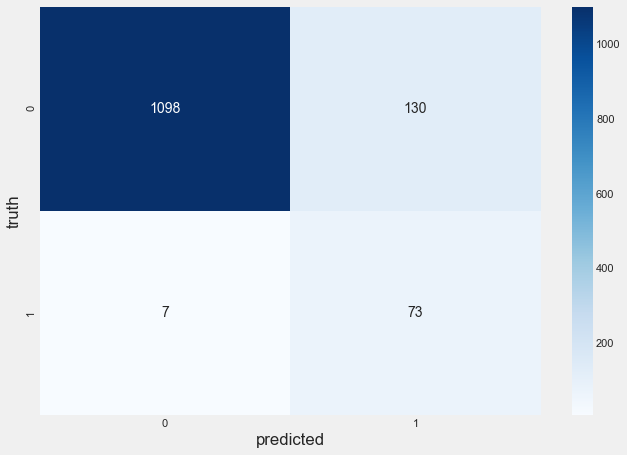

In [768]:
#Confusion matrix for  test data 
get_confusion_matrix(y_test,y_pred_test)

<Figure size 720x504 with 0 Axes>

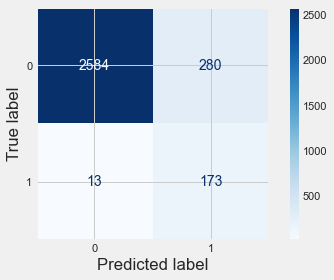

In [769]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(lr, X_train, y_train,cmap='Blues',colorbar=True)
plt.show();

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1117 and 74  are actual predictions and 111 and 6 are innacurate predictions.

True Positives:

Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
True Positive from our matrix :74

True Negatives:

Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected.
True Negative from our matrix :1117

False Positives("Type I error"):

Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
False Positive from our matrix :9
False Negatives("Type II error"):111

Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
False Negative from our matrix :6

Since this model has less number of false negatives so this would be our preferred model. As it is good at predicting classes.

In [770]:
#Checking ROC_AUC score
#Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Checking 
lr_y_pred_prob = lr.predict_proba(X_test)[:,1]
lr_test_roc_auc = roc_auc_score(y_test, lr_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(lr_test_roc_auc)

Test set ROC AUC score: 0.971


0.9709690553745929


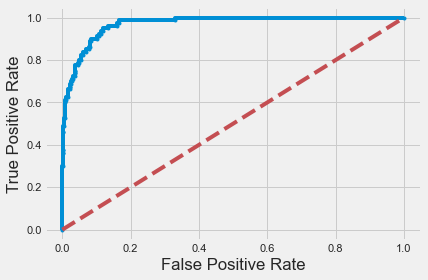

In [771]:

### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_pred_prob)
auc = roc_auc_score(y_test, lr_y_pred_prob)
print(auc)


plt.plot(lr_fpr, lr_tpr, marker = '.', label='lr(area = %0.2f)' % lr_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.97 which means that our classifier is able to predict accurately. 

#The better the AUC measure, the better the model.

In [772]:
#Importing libraries
#Evaluating Recall using cross_val_score
from sklearn.model_selection import cross_val_score

####Initialize the cross_val_score Classifier
lr_scores = cross_val_score(lr, X_resampled, y_resampled, cv=5,scoring="recall").mean()

print('Cross-Validation Recall Scores', lr_scores)

Cross-Validation Recall Scores 0.9284235833974055


In [773]:
## LR_Model_3  (Using subset of features)

In [774]:
#Selecting fetures that were given high importance using RFE
X = loan_df[['CCAvg', 'Education', 'Securities_Account', 'CD_Account','Bank_Services']]
y =loan_df['Personal_Loan']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Using StandardScaler for standardizing
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


#Using RandomOverSampler for balancing the classes in target variable 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

In [775]:
#Importing libraries 
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score

#initialize LogisticRegression classifer
lr_clf = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

#Fit the model 
lr_clf.fit(X_resampled,y_resampled)

#Predict on train and test data
y_pred_test = lr_clf.predict(X_test)
y_pred_train = lr_clf.predict(X_resampled)


#Calling score() to get the result of all evaluation metrics
generate_scores(lr_clf)


Train Positive class Recall  :  0.8010752688172043
Test Positive class Recall  :  0.7875
Confusion matrix  Test :

 [[988 240]
 [ 17  63]]
Confusion matrix Train  :

 [[2353  511]
 [  37  149]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.98      0.80      0.88      1228
           1       0.21      0.79      0.33        80

    accuracy                           0.80      1308
   macro avg       0.60      0.80      0.61      1308
weighted avg       0.94      0.80      0.85      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       0.98      0.82      0.90      2864
           1       0.23      0.80      0.35       186

    accuracy                           0.82      3050
   macro avg       0.61      0.81      0.62      3050
weighted avg       0.94      0.82      0.86      3050



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


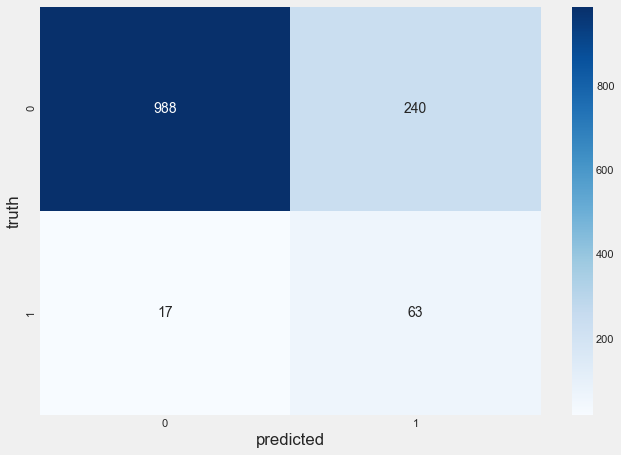

In [776]:
#Confusion matrix for test data 
get_confusion_matrix(y_test,y_pred_test)

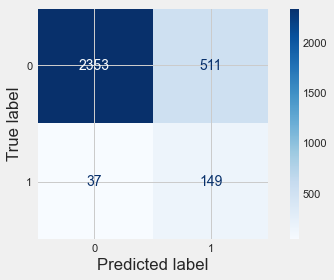

In [777]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_clf, X_train, y_train,cmap='Blues',colorbar=True);

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. 
In the output, 994 and 63  are actual predictions and 234 and 17 are innacurate predictions.

True Positives:
Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
True Positive from our matrix :63

True Negatives:
Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected.
True Negative from our matrix :994

False Positives("Type I error"):
Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
False Positive from our matrix :234
    
False Negatives("Type II error"):
Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
False Negative from our matrix :17

This would not be our preferred model as it has less recall and also more false negatives.

In [778]:
#Checking ROC_AUC score
#Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Checking 
lr_clf_y_pred_prob =lr_clf.predict_proba(X_test)[:,1]
lr_clf_test_roc_auc = roc_auc_score(y_test, lr_clf_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(lr_clf_test_roc_auc))

Test set ROC AUC score: 0.875


0.8754275244299675


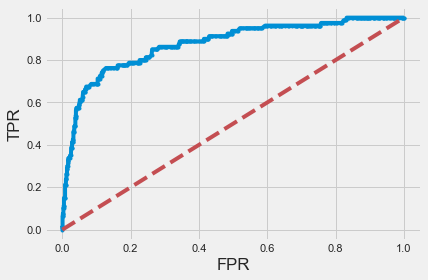

In [779]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


lr_clf_fpr, lr_clf_tpr, lr_clf_thresholds = roc_curve(y_test, lr_clf_y_pred_prob)
auc = roc_auc_score(y_test, lr_clf_y_pred_prob)
print(auc)


plt.plot(lr_clf_fpr, lr_clf_tpr, marker = '.', label='lr_clf(area = %0.2f)' % lr_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.87 which means that our classifier is not able to predict accurately. 


In [780]:
#Importing libraries
from sklearn.model_selection import cross_val_score

####Initialize the LogisticRegression Classifier
lr_clf_scores = cross_val_score(lr_clf, X_resampled, y_resampled, cv=5,scoring="recall").mean()

print('Cross-Validation Recall Scores', lr_clf_scores)

Cross-Validation Recall Scores 0.8030705768925663


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


## Observations 

LR_Model_1:
- Recall for test set is 0.6 when the classes are not balanced. 
- Cross-val-score is 059.

LR_Model_2:
- Recall for test set is 0.87  when the classes(0,1) in target variable(Personal_Loan)are balanced and hypertuning is applied.
- False negatives are around 10. 
- AUC score in this case is 0.97 suggesting that model is good at predicting.
- Cross-val score of 0.93 also shows this model is performing better than other variations of logistic regression models.
  
LR_Model_3:
- Recall is 0.78  when using subset of features.AUC score in this case is 0.87 which means the model is not predicting target class accurately.
- Cross-val-score is 0.79.

## Logistic Regression-Model Conclusion

- Model after balancing the target class and hyperparameter tuning is more reliable model.
 Therefore, we would be considering this model for further analysis.

## K-Nearest Neighbors 

## KNN_Model_1  (Finding Optimal k value manually) :

In [830]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Defining independent(X) and dependent(y)variable
X = loan_df.drop(['Personal_Loan'],axis=1)
y = loan_df[['Personal_Loan']]
#X = pd.get_dummies(X,drop_first=True)


# Spliting X & Y varaibles into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Using StandardScaler for standardizing
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Using RandomOverSampler for balancing the classes in target variable 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

(3050, 11)
(1308, 11)
(3050, 1)
(1308, 1)


In [837]:
#Creating a function to find best value of k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def best_K():
        old_accuracy = 0.0
        bestK = 1
        for k in range (20, 50):
            print(k)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_resampled,y_resampled)
            y_predicted = knn.predict(X_test)
            new_accuracy = knn.score(X_test, y_test)
            print(new_accuracy)
            if new_accuracy > old_accuracy:
                old_accuracy = new_accuracy
                bestk = k
                print(bestk)
        return bestk
    


In [838]:
best_K()

20
0.8906727828746177
20
21
0.8853211009174312
22
0.8868501529051988
23
0.8784403669724771
24
0.8883792048929664
25
0.886085626911315
26
0.8899082568807339
27
0.882262996941896
28
0.8891437308868502
29
0.8845565749235474
30
0.8929663608562691
30
31
0.8906727828746177
32
0.8960244648318043
32
33
0.8906727828746177
34
0.9036697247706422
34
35
0.8998470948012233
36
0.9059633027522935
36
37
0.9036697247706422
38
0.9067278287461774
38
39
0.8998470948012233
40
0.9021406727828746
41
0.9013761467889908
42
0.9021406727828746
43
0.900611620795107
44
0.9021406727828746
45
0.8983180428134556
46
0.9036697247706422
47
0.8952599388379205
48
0.900611620795107
49
0.8998470948012233


38

From the above calculations we can say that optimal value for k is 38 because after the accuracy score starts decreasing.

In [839]:
from sklearn.neighbors import KNeighborsClassifier

#Taking'n_neighbors'=22 as calculated above
#Initialize KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=38)

#Fit the model on train and test  data
knn_clf.fit(X_resampled,y_resampled)

#Predict on test and train data
y_pred_test = knn_clf.predict(X_test)
y_pred_train = knn_clf.predict(X_resampled)

#Calling score() to get the result of all evaluation metrics
generate_scores(knn_clf)


Train Positive class Recall  :  0.9516129032258065
Test Positive class Recall  :  0.8875
Confusion matrix  Test :

 [[1115  113]
 [   9   71]]
Confusion matrix Train  :

 [[2615  249]
 [   9  177]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1228
           1       0.39      0.89      0.54        80

    accuracy                           0.91      1308
   macro avg       0.69      0.90      0.74      1308
weighted avg       0.95      0.91      0.92      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      0.91      0.95      2864
           1       0.42      0.95      0.58       186

    accuracy                           0.92      3050
   macro avg       0.71      0.93      0.77      3050
weighted avg       0.96      0.92      0.93      3050



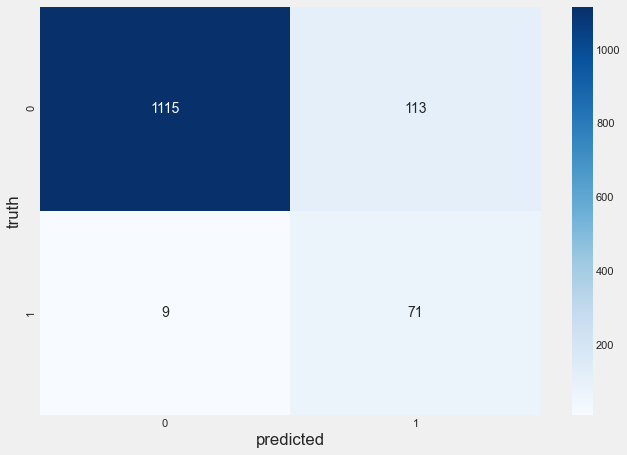

In [840]:
#Confusion matrix for test data
get_confusion_matrix(y_test,y_pred_test)

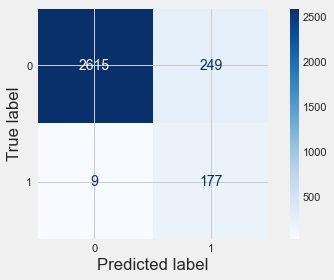

In [841]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn_clf, X_train, y_train,cmap='Blues',colorbar=True);

### Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 733 and 50  are actual predictions and 86 and 6 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
- True Positive from our matrix :50

True Negatives:
-Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected.
- True Negative from our matrix :733

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
- False Positive from our matrix :86

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :6


In [842]:
#Checking ROC_AUC score
#Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Checking 
knn_clf_y_pred_prob = knn_clf.predict_proba(X_test)[:,1]
knn_clf_test_roc_auc = roc_auc_score(y_test, knn_clf_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(knn_clf_test_roc_auc))

Test set ROC AUC score: 0.973


0.9730964983713355


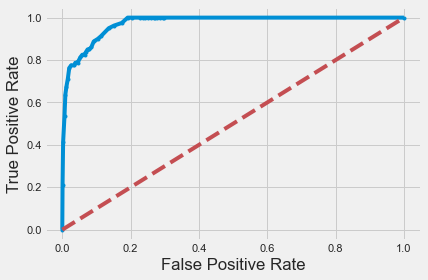

In [843]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


knn_clf_fpr, knn_clf_tpr, knn_clf_thresholds = roc_curve(y_test, knn_clf_y_pred_prob)
auc = roc_auc_score(y_test, knn_clf_y_pred_prob)
print(auc)


plt.plot(knn_clf_fpr, knn_clf_tpr, marker = '.', label='knn_clf(area = %0.2f)' % knn_clf_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.97 which means that our classifier is able to predict accurately. 

#The better the AUC measure, the better the model.

In [844]:
#Importing libraries
#Evaluating Recall using cross_val_score
from sklearn.model_selection import cross_val_score

####Initialize the cross_val_score Classifier
knn_clf_scores = cross_val_score(knn_clf, X_resampled, y_resampled, cv=5,scoring="recall").mean()

print('Cross-Validation Recall Scores', knn_clf_scores)

Cross-Validation Recall Scores 0.9511209558329978


## KNN_Model_2 ( Hyperparameter Tuning )

In [845]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Defining independent(X) and dependent(y)variable
X = loan_df.drop(['Personal_Loan'],axis=1)
y = loan_df[['Personal_Loan']]


# Spliting X & Y varaibles into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Using StandardScaler for standardizing
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Using RandomOverSampler for balancing the classes in target variable
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

(3050, 11)
(1308, 11)
(3050, 1)
(1308, 1)


In [846]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#Creating param grid
param_grid = {'n_neighbors' : [21,22,23,24,25],
              'metric' : ['minkowski','euclidean','manhattan']}


#Using RandomizedSearchCV to find the best combination of parameters
grid_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, return_train_score=True,random_state=52)

#Fit the model
grid_search.fit(X_resampled,y_resampled)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [21, 22, 23, 24, 25]},
                   random_state=52, return_train_score=True)

In [847]:
#Getting the best parameters
grid_search.best_params_

{'n_neighbors': 22, 'metric': 'minkowski'}

In [848]:
 #Getting the best score 
grid_search.best_score_ 

0.9369767636815352

In [849]:
#Initialize KNeighborsClassifier function and pass the parameters obtained using RandomizedSearch
Knn= KNeighborsClassifier(n_neighbors=22,metric='minkowski')   
# minkowski is the default parameter and it decides the distance between the points.

#Fit the model on balanced data
Knn.fit(X_resampled,y_resampled)

#Predict on test and train data
y_pred_test = Knn.predict(X_test)
y_pred_train = Knn.predict(X_resampled)

#Calling score() to get the result of all evaluation metrics
generate_scores(Knn)


Train Positive class Recall  :  0.9946236559139785
Test Positive class Recall  :  0.925
Confusion matrix  Test :

 [[1101  127]
 [   6   74]]
Confusion matrix Train  :

 [[2585  279]
 [   1  185]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1228
           1       0.37      0.93      0.53        80

    accuracy                           0.90      1308
   macro avg       0.68      0.91      0.73      1308
weighted avg       0.96      0.90      0.92      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      0.90      0.95      2864
           1       0.40      0.99      0.57       186

    accuracy                           0.91      3050
   macro avg       0.70      0.95      0.76      3050
weighted avg       0.96      0.91      0.93      3050



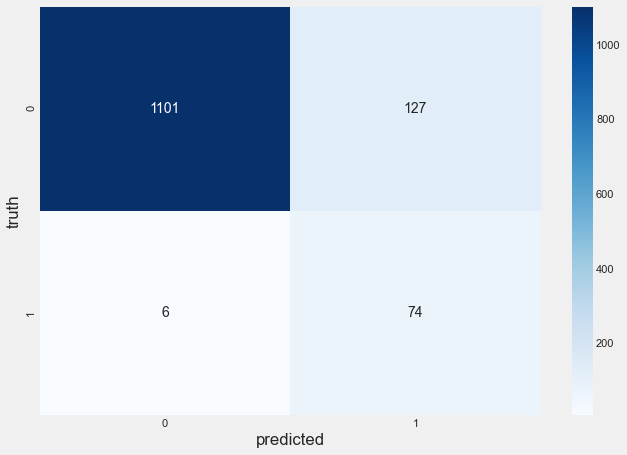

In [850]:
#Confusion matrix for test data 
get_confusion_matrix(y_test,y_pred_test)

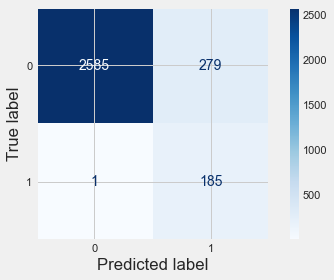

In [851]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(Knn, X_train, y_train,cmap='Blues',colorbar=True);


Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1117 and 74  are actual predictions and 111 and 6 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
- True Positive from our matrix :74

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected.
- True Negative from our matrix :1117

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
- False Positive from our matrix :9

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :6


In [852]:
#Checking ROC_AUC score

#best_model = dt_clf.best_estimator_
#Impprting libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

knn_y_pred_prob = Knn.predict_proba(X_test)[:,1]
knn_test_roc_auc = roc_auc_score(y_test, knn_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(knn_test_roc_auc))

Test set ROC AUC score: 0.962


0.9615380700325733


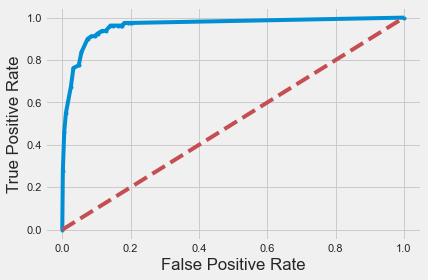

In [853]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred_prob)
auc = roc_auc_score(y_test, knn_y_pred_prob)
print(auc)


plt.plot(knn_fpr, knn_tpr, marker = '.', label='Knn(area = %0.2f)' % knn_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.93 which means that our classifier is able to predict accurately. 

#The better the AUC measure, the better the model.

In [854]:
#Evaluating Recall using cross_val_score
#importing libraries
from sklearn.model_selection import cross_val_score

#Initialize cross_val_score classifier 
knn_scores = cross_val_score(Knn, X_resampled, y_resampled, cv=5).mean()

print('Cross-Validation Accuracy Scores', knn_scores)

Cross-Validation Accuracy Scores 0.9369767636815352


In [855]:
## KNN Observations

KNN_Model_1  (Finding Optimal k value manually) :
- Recall value for both test and train are far apart.

KNN_Model_2(Hyperparameter Tuning):
- Recall improved after hyperparameter tuning .
- Also, False Negatives came down to 6.
- AUC score in this case was 0.96 which suggested model is good at predicting the two classes.

## KNN-Model Conclusion

- Model obtained after performing hyperparameter tuning is performing better. Therefore, we would be considering this model for further analysis.


## Decision Tree 

## DT_Model_1(Unoptimized + Class_weights)

Overview :


- We will build the Decision Tree model using the default 'gini' criteria to split.
- In our dataset, we know that there is an imbalance in the Dependent variable Personal_Loan. ie. 90.4% of frequency is for 0 and 9.6% is for 1.
- This might cause the Decision Tree model to become biased towards the dominant class
- Hence we will add a class_weight hyperparameter as a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1

In [856]:
## Defining independent(X) and dependent(y)variable
X= loan_df.drop(['Personal_Loan'],axis=1)
y=loan_df['Personal_Loan']

#Importing train-test-split
from sklearn.model_selection import train_test_split
# Splitting data into training and test set:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=29)
print(X_train.shape,X_test.shape)

#Using StandardScaler for standardizing
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

(3050, 11) (1308, 11)


In [857]:
#Importing all libraries
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#We are adding class_weight hyperparameter as a dictionary {0:0.15,1:0.85} to the model to 
#specify the weight of each class and the decision tree will give more weightage to class 1

# Initialize DecisionTreeClassifier   
#dt_clf = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=42)
dt_clf = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=42)

#Fit the model on train and test data
dt_clf.fit(X_train,y_train)

#Predict on train and test
y_pred_test = dt_clf.predict(X_test)
y_pred_train=dt_clf.predict(X_train)

#Calling score() to get the result of all evaluation metrics
generate_scores(dt_clf)


Train Positive class Recall  :  1.0
Test Positive class Recall  :  0.8484848484848485
Confusion matrix  Test :

 [[1220   22]
 [  10   56]]
Confusion matrix Train  :

 [[2850    0]
 [   0  200]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1242
           1       0.72      0.85      0.78        66

    accuracy                           0.98      1308
   macro avg       0.85      0.92      0.88      1308
weighted avg       0.98      0.98      0.98      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      1.00      1.00       200

    accuracy                           1.00      3050
   macro avg       1.00      1.00      1.00      3050
weighted avg       1.00      1.00      1.00      3050



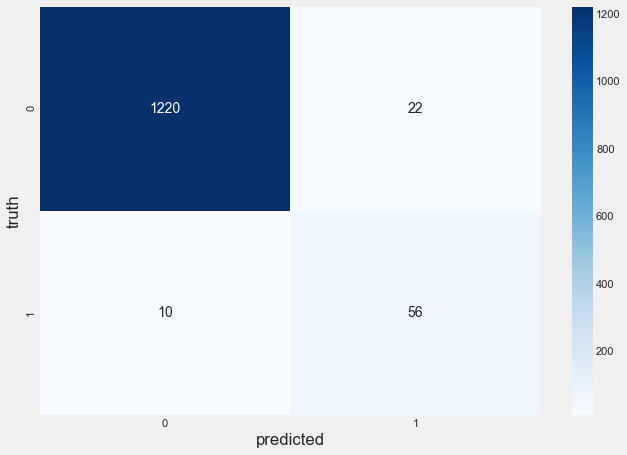

In [858]:
#Confusion matrix for  test data 
get_confusion_matrix(y_test,y_pred_test)

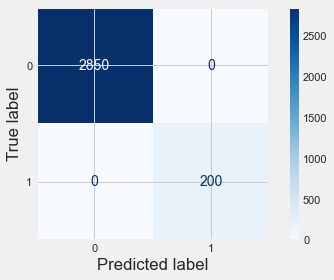

In [859]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_train, y_train,cmap='Blues',colorbar=True);

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1219 and 55  are actual predictions and 23 and 11 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
- True Positive from our matrix :55

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
 Outcome: The business is unaffected.
- True Negative from our matrix :1219

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
- False Positive from our matrix :23

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :11



In [860]:
#Checking ROC_AUC score

#best_model = dt_clf.best_estimator_
#Impprting libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

dt_clf_y_pred_prob = dt_clf.predict_proba(X_test)[:,1]
dt_clf_test_roc_auc = roc_auc_score(y_test, dt_clf_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(dt_clf_test_roc_auc))

Test set ROC AUC score: 0.915


0.9153857414726981


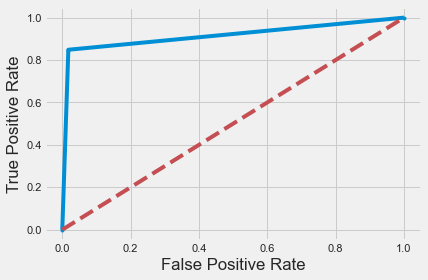

In [861]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


dt_clf_fpr, dt_clf_tpr, dt_clf_thresholds = roc_curve(y_test, dt_clf_y_pred_prob)
auc = roc_auc_score(y_test, dt_clf_y_pred_prob)
print(auc)


plt.plot(dt_clf_fpr, dt_clf_tpr, marker = '.', label='Knn(area = %0.2f)' % dt_clf_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.93 which means that our classifier is able to predict accurately. 

#The better the AUC measure, the better the model.


In [862]:
#Evaluating Recall using cross_val_score
#Importing libraries
from sklearn.model_selection import cross_val_score

####Initialize  cross_val_score Classifier
dt_clf_scores = cross_val_score(dt_clf, X, y, cv=5,scoring="recall").mean()

print('Cross-Validation Recall Scores', dt_clf_scores)

Cross-Validation Recall Scores 0.7783368273934312


## DT_Model_2(Hyperparameter Tuning using GridSearchCV )

GridSearch for Hyperparameter tuning of Tree Model
Hyperparameters are variables that control the network structure of the Decision tree.
As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
This is a tuning technique that will compute the optimum values of specific hyperparamters of the model
The parameters are optimized using a cross-validated GridSearch over a parameter grid

In [863]:
from sklearn.model_selection import GridSearchCV
# Initialize DecisionTreeClassifier  
dt = DecisionTreeClassifier(random_state=29,class_weight = {0:0.15,1:0.85}) #adding classweights 
#We are adding class_weight hyperparameter as a dictionary {0:0.15,1:0.85} to the model to 
#specify the weight of each class and the decision tree will give more weightage to class 1

#Creating param grid
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search with the above parameters
grid_search = GridSearchCV(dt, parameters, scoring=recall_scorer,cv=5)

#Fit the model
grid_obj = grid_search.fit(X_train, y_train)

# Set to the best combination of parameters
dt = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)

#Calling score() to get the result of all evaluation metrics
generate_scores(dt)


Train Positive class Recall  :  0.93
Test Positive class Recall  :  0.9242424242424242
Confusion matrix  Test :

 [[1091  151]
 [   5   61]]
Confusion matrix Train  :

 [[2517  333]
 [  14  186]]
Classification report Test :

               precision    recall  f1-score   support

           0       1.00      0.88      0.93      1242
           1       0.29      0.92      0.44        66

    accuracy                           0.88      1308
   macro avg       0.64      0.90      0.69      1308
weighted avg       0.96      0.88      0.91      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       0.99      0.88      0.94      2850
           1       0.36      0.93      0.52       200

    accuracy                           0.89      3050
   macro avg       0.68      0.91      0.73      3050
weighted avg       0.95      0.89      0.91      3050



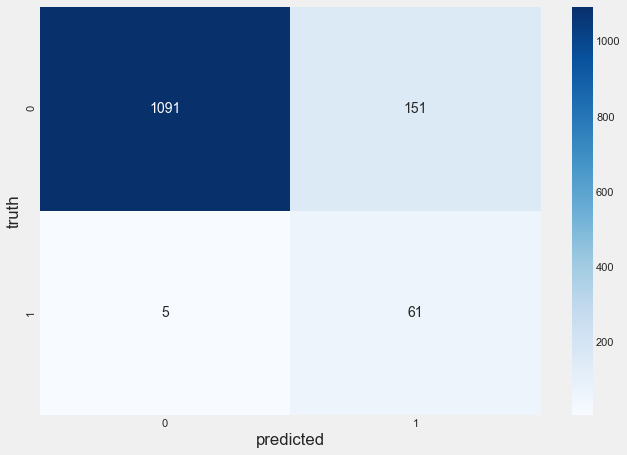

In [864]:
#Confusion matrix on test data 
get_confusion_matrix(y_test,y_pred_test)

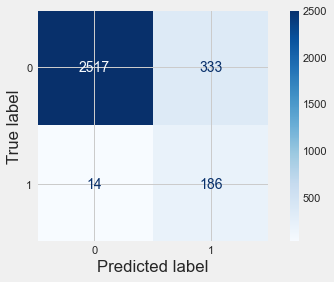

In [865]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt, X_train, y_train,cmap='Blues',colorbar=True);

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1190 and 58  are actual predictions and 52 and 8 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
- True Positive from our matrix :58

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected.
- True Negative from our matrix :1190

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
- False Positive from our matrix :52

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :8


In [866]:
#Checking ROC_AUC score

#best_model = dt_clf.best_estimator_
#Impprting libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

dt_y_pred_prob = dt.predict_proba(X_test)[:,1]
dt_test_roc_auc = roc_auc_score(y_test, dt_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(dt_test_roc_auc))

Test set ROC AUC score: 0.922


0.9215707802664325


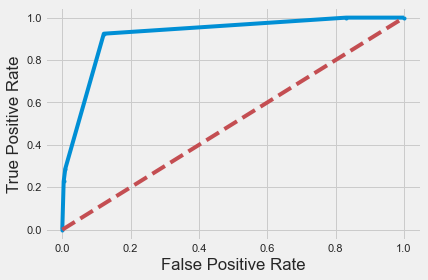

In [867]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_pred_prob)
auc = roc_auc_score(y_test, dt_y_pred_prob)
print(auc)


plt.plot(dt_fpr, dt_tpr, marker = '.', label='Decision Tree(area = %0.2f)' % dt_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.86 which means that our classifier is not so good at predicting
#class 1 as 1 and class 0 as o 


#For a model to be good the AUC score should be close to 1.


In [868]:
#Evaluating Recall using cross-vl-score
#Importing libraries
from sklearn.model_selection import cross_val_score

#Initialize cross_val_score classifier
dt_scores = cross_val_score(dt, X, y, cv=5,scoring='recall').mean()

print('Cross-Validation Recall Scores', dt_scores)

Cross-Validation Recall Scores 0.9133473095737246


DT_Model_1(Unoptimized + Class_weights):
- Recall Scores for train and test set were far apart
- This suggests that the model is overfitting.

DT_Model_2(Hyperparameter Tuning using GridSearchCV )
- Recall for test set has improved to 0.92 after hyperparameter tuning.
- False Negatives is less. 
- AUC score is 0.92

## DT-Model Conclusion

- Model with Hyperparameter Tuning is more reliable. Therefore, we would be considering this model for further analysis as the
  recall values are better for the  test set.


## Random Forest 

###  RF_Model_1(UnOptimized + RandomOverSampler ):

In [869]:
## Defining independent(X) and dependent(y)variable
X= loan_df.drop(['Personal_Loan'],axis=1)
y=loan_df['Personal_Loan']

# Splitting data into training and test set:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=29)
print(X_train.shape,X_test.shape)


#Using StandardScaler for standardizing
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


#Using RandomOverSampler for balancing the classes in target variable 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

(3050, 11) (1308, 11)


In [870]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

###Initialize the RandomForestClassifier Classifier 
rf_clf = RandomForestClassifier(random_state =42,criterion='gini')

#Fit the model on test and train data
rf_clf.fit(X_resampled,y_resampled)

#Predict on train and test data
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_resampled)

#Calling score() to get the result of all evaluation metrics
generate_scores(rf_clf)


Train Positive class Recall  :  1.0
Test Positive class Recall  :  0.8636363636363636
Confusion matrix  Test :

 [[1228   14]
 [   9   57]]
Confusion matrix Train  :

 [[2850    0]
 [   0  200]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1242
           1       0.80      0.86      0.83        66

    accuracy                           0.98      1308
   macro avg       0.90      0.93      0.91      1308
weighted avg       0.98      0.98      0.98      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      1.00      1.00       200

    accuracy                           1.00      3050
   macro avg       1.00      1.00      1.00      3050
weighted avg       1.00      1.00      1.00      3050



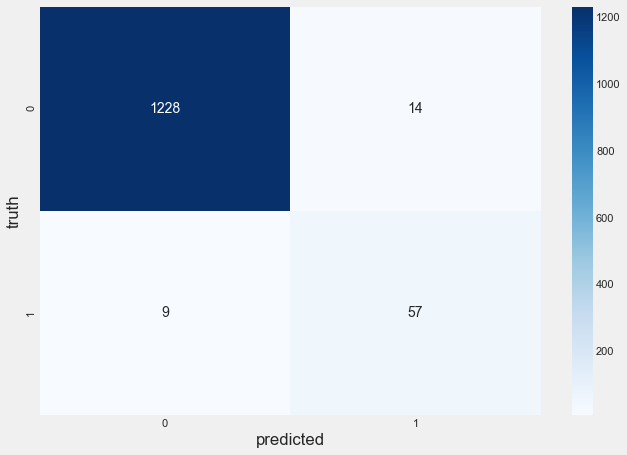

In [871]:
#Confusion matrix for test data 
get_confusion_matrix(y_test,y_pred_test)

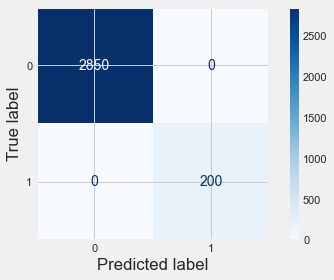

In [872]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_clf, X_train, y_train,cmap='Blues',colorbar=True);


Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1227 and 57 are actual predictions and 9 and 15 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will take personal loan. Outcome: The model is good. 
- True Positive from our matrix :57

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. Outcome: The business is unaffected. 
- True Negative from our matrix :1227

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan. 
- False Positive from our matrix :15 

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :9

In [873]:
#Checking ROC_AUC score

#best_model = dt_clf.best_estimator_
#Impprting libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf_clf_y_pred_prob =rf_clf.predict_proba(X_test)[:,1]
rf_clf_test_roc_auc = roc_auc_score(y_test, rf_clf_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(rf_clf_test_roc_auc))

Test set ROC AUC score: 0.995


0.9954862636022056


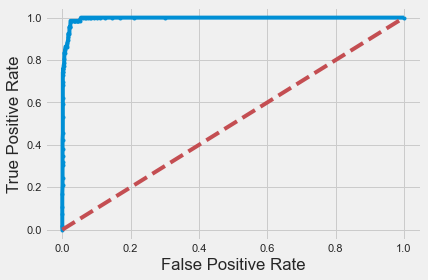

In [874]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#ROC Curves are summaries of the trade-off between true positive and false positive rates
#ROC curves are most appropriate for balanced datasets
#precision-recall curve summarizes the trade-off between true positive rate
#and positive predictive values. These are best for imbalanced datasets
rf_clf_fpr, rf_clf_tpr, rf_clf_thresholds = roc_curve(y_test, rf_clf_y_pred_prob)
auc = roc_auc_score(y_test, rf_clf_y_pred_prob)
print(auc)


plt.plot(rf_clf_fpr, rf_clf_tpr, marker = '.', label='Random Forest (area = %0.2f)' % rf_clf_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.995which means that our classifier is good at predicting
#class 1 as 1 and class 0 as 0


#For a model to be good the AUC score should be close to 1.

In [875]:
##Evaluating Recall using cross_val_score
#Importing libraries
from sklearn.model_selection import cross_val_score

#imitialize cross_val_score classifier
rf_clf_scores = cross_val_score(rf_clf, X, y, cv=5).mean()

print('Cross-Validation Recall Scores', rf_clf_scores)

Cross-Validation Recall Scores 0.9830209397613204


### RF_Model_2(Hyperparameter Tuning + RandomOverSampler)

In [876]:
#Importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

####Initialize the RandomForestClassifier   
classifier = RandomForestClassifier(random_state=10)

#Creating param grid  
param_grid =  {
                'min_samples_leaf': [1,2,4,6,8,10],
                'n_estimators' :[100,200,300,400,500,600],
                'max_depth': [2,4,6,8,9,10],
                'max_features':['auto','sqrt','log2'],
                'min_samples_split' : [5,10,15,20,25]
             
               }
#Using RandomizedSearchCV to find the best combination of parameters
grid_search = RandomizedSearchCV(classifier, param_grid,cv=5,verbose=2,random_state=10,n_jobs=-1) #-1 means using all processors

#Fit the model 
grid_search.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=10, verbose=2)

In [877]:
#Getting the best parameters
grid_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 25,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 8}

In [878]:
#Getting the best score 
grid_search.best_score_

0.9887719298245614

In [879]:
#Initialize RandomForestClassifier function and pass the parameters obtained using RandomizedSearchCV
rf= RandomForestClassifier(n_estimators=600,min_samples_split=25,min_samples_leaf=1,max_features='log2',max_depth=8)

#Fit the model on balanced data
rf.fit(X_resampled,y_resampled)

#Predict on test set and training set 
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_resampled)


#Calling score() to get the result of all evaluation metrics
generate_scores(rf)


Train Positive class Recall  :  1.0
Test Positive class Recall  :  0.9696969696969697
Confusion matrix  Test :

 [[1210   32]
 [   2   64]]
Confusion matrix Train  :

 [[2812   38]
 [   0  200]]
Classification report Test :

               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1242
           1       0.67      0.97      0.79        66

    accuracy                           0.97      1308
   macro avg       0.83      0.97      0.89      1308
weighted avg       0.98      0.97      0.98      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2850
           1       0.84      1.00      0.91       200

    accuracy                           0.99      3050
   macro avg       0.92      0.99      0.95      3050
weighted avg       0.99      0.99      0.99      3050



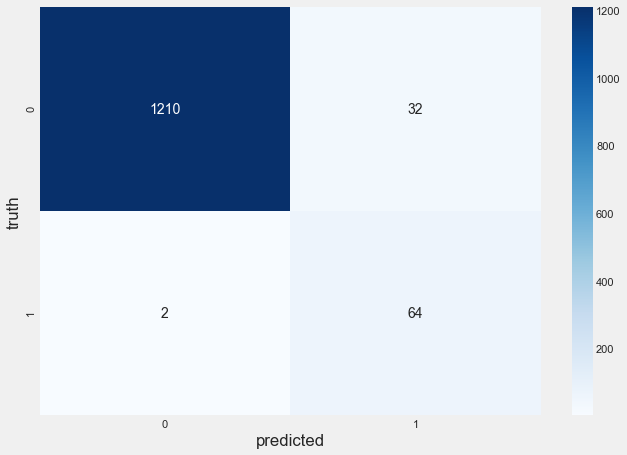

In [880]:
#Confusion matrix for test data 
get_confusion_matrix(y_test,y_pred_test)

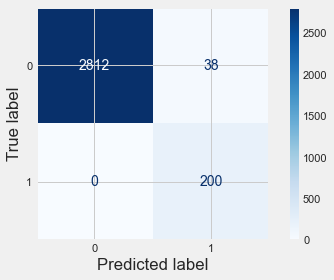

In [881]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_train, y_train,cmap='Blues',colorbar=True);

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1227 and 57 are actual predictions and 9 and 15 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will take personal loan. Outcome: The model is good. 
- True Positive from our matrix :57

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. Outcome: The business is unaffected. 
- True Negative from our matrix :1227

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan. 
- False Positive from our matrix :15 

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :2

In [882]:
#Checking ROC_AUC score

#best_model = dt_clf.best_estimator_
#Impprting libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf_y_pred_prob =rf.predict_proba(X_test)[:,1]
rf_test_roc_auc = roc_auc_score(y_test, rf_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(rf_test_roc_auc))

Test set ROC AUC score: 0.994


0.994205338408237


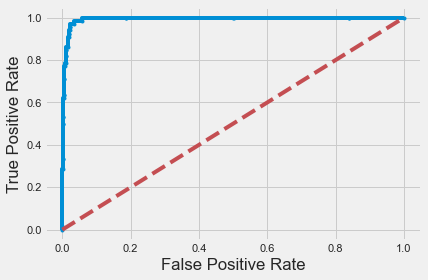

In [883]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#ROC Curves are summaries of the trade-off between true positive and false positive rates
#ROC curves are most appropriate for balanced datasets
#precision-recall curve summarizes the trade-off between true positive rate
#and positive predictive values. These are best for imbalanced datasets
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_prob)
auc = roc_auc_score(y_test, rf_y_pred_prob)
print(auc)


plt.plot(rf_fpr, rf_tpr, marker = '.', label='Random Forest (area = %0.2f)' % rf_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');



#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.99 which means that our classifier is best at predicting
#class positive as positive and negative as negative 


#For a model to be good the AUC score should be close to 1.

In [884]:
##Evaluating Recall using cross_val_score
#Importing libraries 
from sklearn.model_selection import cross_val_score

#Initialize cross_val_score classifier
rf_scores = cross_val_score(rf, X, y, cv=5).mean()

print('Cross-Validation Recall Scores', rf_scores)

Cross-Validation Recall Scores 0.9809554029429423


### RF_Model_3(Checking feature importances):

In [885]:
#Checking feature importances
rf.feature_importances_

array([0.02713268, 0.01865108, 0.01615163, 0.55654536, 0.0366096 ,
       0.21266668, 0.05890632, 0.0143497 , 0.00309009, 0.04031063,
       0.01558622])

In [886]:
#Creating dataframe with feature names and importances
df = pd.DataFrame({'Feature_names':X.columns,
                  'Importances':rf.feature_importances_})
df.sort_values(by='Importances',ascending=False)

,Feature_names,Importances
3,Income,0.556545
5,CCAvg,0.212667
6,Education,0.058906
9,CD_Account,0.040311
4,Family,0.036610
0,ID,0.027133
1,Age,0.018651
2,Experience,0.016152
10,Bank_Services,0.015586
7,Mortgage,0.014350


Considering Income , CCAvg, Education, Family as they have high importance.

In [887]:
## Defining independent(X) and dependent(y)variable
X= loan_df[['Income','CCAvg','Education','Family']]
y=loan_df['Personal_Loan']

# Splitting data into training and test set:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=29)
print(X_train.shape,X_test.shape)


#Using StandardScaler for standardizing
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


#Using RandomOverSampler for balancing the classes in target variable 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

(3050, 4) (1308, 4)


In [888]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier


#Initialize RandomForestClassifier
rf_sub = RandomForestClassifier(random_state =42)

#Fit the model on test and train data
rf_sub.fit(X_resampled,y_resampled)

#Predict on train and test data
y_pred_test = rf_sub.predict(X_test)
y_pred_train = rf_sub.predict(X_resampled)

#Calling score() to get the result of all evaluation metrics
generate_scores(rf_sub)


Train Positive class Recall  :  1.0
Test Positive class Recall  :  0.8636363636363636
Confusion matrix  Test :

 [[1221   21]
 [   9   57]]
Confusion matrix Train  :

 [[2850    0]
 [   0  200]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1242
           1       0.73      0.86      0.79        66

    accuracy                           0.98      1308
   macro avg       0.86      0.92      0.89      1308
weighted avg       0.98      0.98      0.98      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      1.00      1.00       200

    accuracy                           1.00      3050
   macro avg       1.00      1.00      1.00      3050
weighted avg       1.00      1.00      1.00      3050



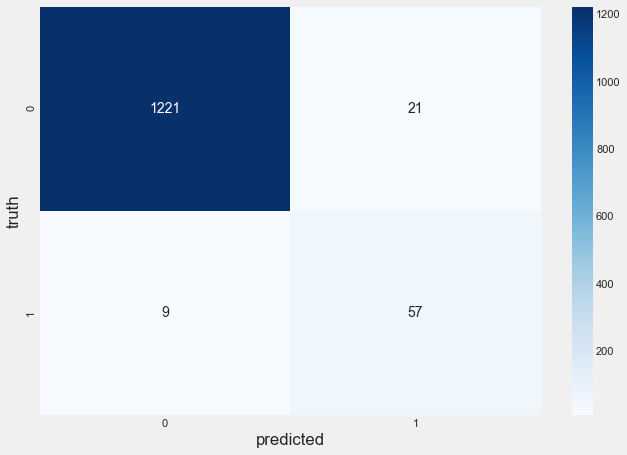

In [889]:
#Confusion matrix for test data 
get_confusion_matrix(y_test,y_pred_test)

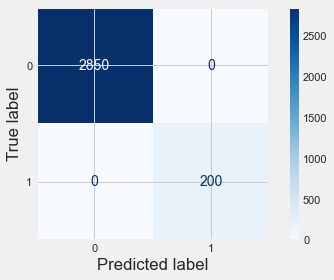

In [890]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_sub, X_train, y_train,cmap='Blues',colorbar=True);

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1203 and 62  are actual predictions and 39 and 4 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
- True Positive from our matrix :62

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected.
- True Negative from our matrix :1203

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.
- False Positive from our matrix :39

False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers.
If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :4


In [891]:
#Checking ROC_AUC score
#Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Checking 
rf_sub_y_pred_prob = rf_sub.predict_proba(X_test)[:,1]
rf_sub_test_roc_auc = roc_auc_score(y_test, rf_sub_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(rf_sub_test_roc_auc))

Test set ROC AUC score: 0.993


0.9929854096520764


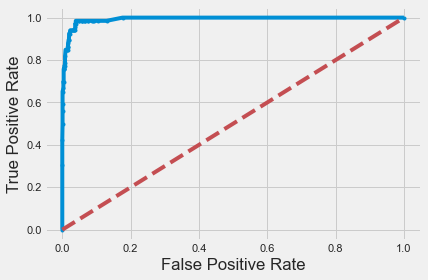

In [892]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


rf_sub_fpr, rf_sub_tpr, rf_sub_thresholds = roc_curve(y_test, rf_sub_y_pred_prob)
auc = roc_auc_score(y_test, rf_sub_y_pred_prob)
print(auc)


plt.plot(rf_sub_fpr, rf_sub_tpr, marker = '.', label='rf_sub(area = %0.2f)' % rf_sub_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.97 which means that our classifier is able to predict accurately. 

#The better the AUC measure, the better the model

In [893]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_sub, X_resampled, y_resampled, cv=5).mean()

print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores 0.9959649122807018


RF Observations
RF_Model_1 (UnOptimized + RandomOverSampler):

- Recall Scores for train and test set are quiet far apart.
- This suggests that the model is Overfitted.

RF_Model_2 (Hyperparameter Tuning + RandomOverSampler ):
- Recall is 0.969 for test set after applying hyperparameter tuning using RandomizedSearchCV.
- Cross-val-score(0.982) is also better than other variations of randomforest

RF_Model_3(Subset of features + RandomOverSampler):
- Recall for test and train are far apart.

RF-Model Conclusion:

Model with Hyperparameter Tuning is more reliable. Therefore, we would be considering this model for further analysis.

## Xgboost 

### XGB_Model_1(Unoptimized):

In [894]:
## Defining independent(X) and dependent(y)variable
X = loan_df.drop('Personal_Loan',axis=1)
y= loan_df['Personal_Loan']

# Spliting X & Y varaibles into (70%) Train and (30%)Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Using StandardScaler for standardizing the variables
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Using RandomOverSampler for balancing the classes in target variable(Personal_Loan)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

(3050, 11)
(1308, 11)
(3050,)
(1308,)


In [895]:
###Initialize the XGBClassifier  
from xgboost import XGBClassifier
xgboost_clf = XGBClassifier(random_state=42)
xgboost_clf.fit(X_resampled,y_resampled)

#prediction on test and train data 
y_pred_test = xgboost_clf.predict(X_test)
y_pred_train =  xgboost_clf.predict(X_resampled)

#Calling score() to get the result of all evaluation metrics
generate_scores(xgboost_clf)

[17:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Positive class Recall  :  1.0
Test Positive class Recall  :  0.8375
Confusion matrix  Test :

 [[1216   12]
 [  13   67]]
Confusion matrix Train  :

 [[2864    0]
 [   0  186]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1228
           1       0.85      0.84      0.84        80

    accuracy                           0.98      1308
   macro avg       0.92      0.91      0.92      1308
weighted avg       0.98      0.98      0.98      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2864
      

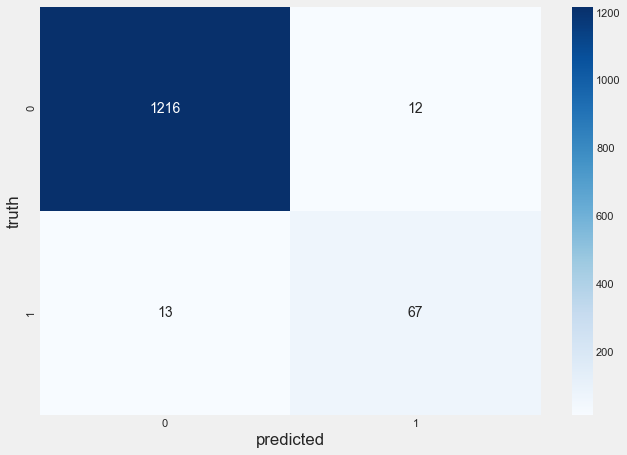

In [896]:
##Confusion matrix on test data 
get_confusion_matrix(y_test,y_pred_test)

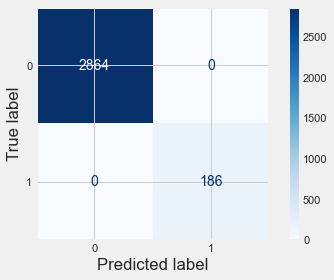

In [897]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgboost_clf, X_train, y_train,cmap='Blues',colorbar=True);

#### Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. 
In the output, 1215 and 67  are actual predictions and 13 and 13 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan. 
- Model Prediction: The customer will take personal loan. 
- Outcome: The model is good.
- True Positive from our matrix :67

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. 
- Outcome: The business is unaffected.
- True Negative from our matrix :1215

False Positives("Type I error"):
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. 
- Outcome: The team which is targeting the potential customers would waste their resources on the customers who 
will not be buying a personal loan.
- False Positive from our matrix :13


False Negatives("Type II error"):
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. 
- Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. 
The purpose of campaign was to target such customers. 
- If team knew about this customers, they could have offered some good APR /interest rates.
- False Negative from our matrix :13


In [898]:
#Checking ROC_AUC score
#Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Checking 
xgboost_clf_y_pred_prob = xgboost_clf.predict_proba(X_test)[:,1]
xgboost_clf_test_roc_auc = roc_auc_score(y_test, xgboost_clf_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(xgboost_clf_test_roc_auc))

Test set ROC AUC score: 0.994


0.9936991042345277


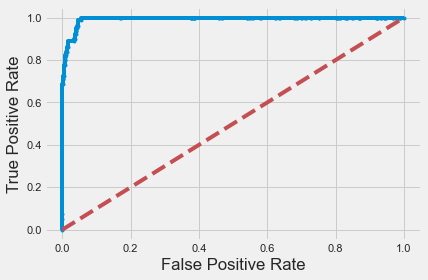

In [899]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


xgboost_clf_fpr, xgboost_clf_tpr, xgboost_clf_thresholds = roc_curve(y_test, xgboost_clf_y_pred_prob)
auc = roc_auc_score(y_test, xgboost_clf_y_pred_prob)
print(auc)


plt.plot(xgboost_clf_fpr, xgboost_clf_tpr, marker = '.', label='xgboost_clf_tpr(area = %0.2f)' % xgboost_clf_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');


#Analysis :
#The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives 
#to the rate of false positives.

#Since the AUC score is close to 0.995 which means that our classifier is able to predict accurately. 

#The better the AUC measure, the better the model.

In [900]:
#Evaluating Recall using cross_val_score
#Importing libraries
from sklearn.model_selection import cross_val_score

####Initialize the cross_val_score Classifier
xgboost_clf = cross_val_score(xgboost_clf, X, y, cv=5,scoring="recall").mean()

print('Cross-Validation Recall Scores', xgboost_clf)

[17:25:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### XGB_Model_2 (Hyperparameter tuning)

- In RandomizedSearchCV only few samples are randomly selected.

- When hyper parameters are not given to an algorithm, default values are picked to run the model. 
 This makes hyper parameter tuning one of the critical steps involved in machine learning 
implementation.

In [909]:
#Importing required libraries 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

##Initialize the XGBClassifier 
xg_clf = XGBClassifier(random_state=42 )

#Creating param grid
param_grid  = {
             "gamma": [0,0.25,0.5,1.0],
             "subsample":[0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
             "max_depth":[1,2,3,4,5,6,7,8,9,10],
             "learning_rate":[0.001, 0.01, 0.1, 0.2, 0,3],
             "min_child_weight" :[0.5, 1.0,1.5, 2.0, 2.5, 3.0, 5.0, 7.0, 10.0],
             "reg_alpha":[0, 0.001, 0.005, 0.01, 0.05],
             "colsample_bytree":[0.8],
             "scale_pos_weight":[1]

             }
#Using RandomizedSearchCV to find the best combination of parameters
grid_search = RandomizedSearchCV(xg_clf,param_grid, n_jobs = -1, verbose = 2,random_state=42)
grid_search.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'ga

In [910]:
#Getting the best parameters
grid_search.best_params_

{'subsample': 0.9,
 'scale_pos_weight': 1,
 'reg_alpha': 0.005,
 'min_child_weight': 1.5,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 1.0,
 'colsample_bytree': 0.8}

In [911]:
#Getting the best score 
grid_search.best_score_

0.9935418429014533

In [912]:
#Initializing XGBClassifier and passing the parameters obtained using RandomizedSearchCV
xgb= XGBClassifier(learning_rate=0.1,colsample_bytree=0.8,scale_pos_weight=1,max_depth=4,min_child_weight=1.5,subsample=0.9,gamma=1.0,reg_alpha=0.005,random_state=42)

#Fitting the model on balanced  train and test data
xgb.fit(X_resampled,y_resampled)

#prediction on test and train data 
y_pred_test = xgb.predict(X_test)
y_pred_train=xgb.predict(X_resampled)

#Calling score() to get the result of all evaluation metrics
generate_scores(xgb)

[17:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Positive class Recall  :  1.0
Test Positive class Recall  :  0.8875
Confusion matrix  Test :

 [[1203   25]
 [   9   71]]
Confusion matrix Train  :

 [[2849   15]
 [   0  186]]
Classification report Test :

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1228
           1       0.74      0.89      0.81        80

    accuracy                           0.97      1308
   macro avg       0.87      0.93      0.90      1308
weighted avg       0.98      0.97      0.98      1308

Classification report Train  :

               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2864
      

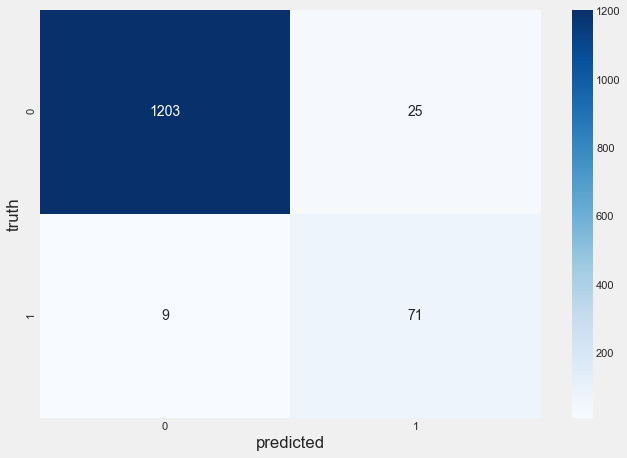

In [913]:
#Confusion matrix on test data 
get_confusion_matrix(y_test,y_pred_test)

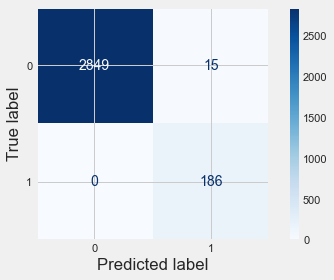

In [914]:
#Plotting confusion matrix for  train data 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb, X_train, y_train,cmap='Blues',colorbar=True);

Interpretation of test confusion matrix:

Diagonal values represent accurate predictions, while non-diagonal predictions are not accurate. In the output, 1207 and 72 are actual predictions and 21 and 8 are innacurate predictions.

True Positives:
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will take personal    loan. Outcome: The model is good.
- True Positive from our matrix :72

True Negatives:
- Reality: A customer didn't wanted to take personal loan. Model Prediction: The customer will not take personal loan. Outcome: The business is unaffected.
- True Negative from our matrix :1207

False Positives("Type I error"): 
- Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan. 
- False Positive from our matrix :21

False Negatives("Type II error"): 
- Reality: A customer wanted to take personal Loan. Model Prediction: The customer will not take personal loan. Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates. 
- False Negative from our matrix :8

In [915]:
#Checking ROC_AUC score

#best_model = dt_clf.best_estimator_
#Impprting libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

xgb_y_pred_prob =xgb.predict_proba(X_test)[:,1]
xgb_test_roc_auc = roc_auc_score(y_test, xgb_y_pred_prob)
print('Test set ROC AUC score: {:.3f}'.format(xgb_test_roc_auc))

Test set ROC AUC score: 0.993


0.993047638436482


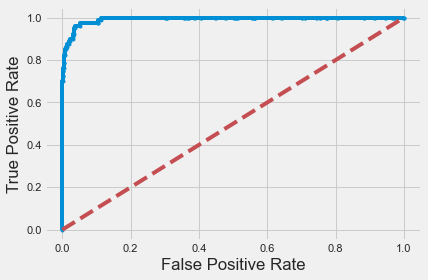

In [916]:
### ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#ROC Curves are summaries of the trade-off between true positive and false positive rates
#ROC curves are most appropriate for balanced datasets
#precision-recall curve summarizes the trade-off between true positive rate
#and positive predictive values. These are best for imbalanced datasets
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_pred_prob)
auc = roc_auc_score(y_test, xgb_y_pred_prob)
print(auc)


plt.plot(xgb_fpr, xgb_tpr, marker = '.', label='XGBoost (area = %0.2f)' % xgb_test_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [917]:
#Evaluating Recall using cross_val_score
#Importing libraries
from sklearn.model_selection import cross_val_score

####Initialize  cross_val_score Classifier 
xgb_scores = cross_val_score(xgb, X, y, cv=5).mean()

print('Cross-Validation Recall Scores', xgb_scores)

[17:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

XGB Observations
XGB_Model_1 (UnOptimized):
- Recall is 0.9 little low than hypertuned model.

XGB_Model_2(Hyperparameter Tuning ):
- Recall is 0.92  after applying hyperparameter tuning using RandomizedSearchCV.
- Cross-val-score(0.984) is also better than other variations of xgboost

### XGBoost-Model Conclusion:

Model after balancing the target class and hypertuning of parameters is more reliable model. Therefore, we would be considering this model for further analysis.

## Models Comparision 

In [920]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','KNN','Decision tree',
                                          'Random Forest','XGBoost'], 'Train_Recall':[0.93,0.99,0.93,1.0, 1.0], 'Test_Recall':[0.91,0.92,0.92,0.96,0.91],
                                           'Cross-Val Recall Score ' :[0.92,0.93,0.91,0.98,0.98],'AUC-Score': [0.97,0.96,0.92,0.99,0.99]}) 
comparison_frame.sort_values(ascending=False,by='Test_Recall')


,Model,Train_Recall,Test_Recall,Cross-Val Recall Score,AUC-Score
3,Random Forest,1.00,0.96,0.98,0.99
1,KNN,0.99,0.92,0.93,0.96
2,Decision tree,0.93,0.92,0.91,0.92
0,Logistic Regression,0.93,0.91,0.92,0.97
4,XGBoost,1.00,0.91,0.98,0.99


In [925]:
#Top 3 models with Highest testing Recall are - 
comparison_frame.sort_values(ascending=False,by=['Test_Recall'])['Test_Recall'].head(3)

3    0.96
1    0.92
2    0.92
Name: Test_Recall, dtype: float64

In [922]:
#Top 3 models with Highest training accuracy are - 
comparison_frame.sort_values(ascending=False,by=['Train_Recall'])['Train_Recall'].head(3)

3    1.00
4    1.00
1    0.99
Name: Train_Recall, dtype: float64

## Conclusion :

- From the above, we can clearly see that Random Forest Alogorithm  gave us best Recall of 96%.
- Also Type II(False Negative) errors are close to 2  in Random Forest model.
- The area in ROC curve for Random Forest  is 0.99 which is close to 1 which suggests that Random Forest is the best model in comparision to other models.
- Cross-val score is close to 0.98
- Therefore,Random Forest  would be the best choice for predicting  whether customer would be interested in taking personal loan or not. 

# Actionable Insights & Recommendations

- As we have observed that Income is most important Feature, which indicates that Income has a good effect on Personal Loan, Customers with High Income have more chances of having Personal Loan. So it is advised to Target Customers with high income
- CCAvg also show a good relationship with Personal Loan, which means customer who are spending more on credit cards can be targeted for Personal Loan
- Since CD account has good relation with Personal loan, customers having CD account can be targeted for personal loans
- Customers who has more family members can be targted for personal loan as well, since the relation between Family variable with personal loan is also good
- Customer willing to have high mortgage value can also be targeted for personal loan
- Customer whose Education level is high can be targeted for personal loan
- Customer using addition bank services like Credit card or online doesn't have any significant impact on personal loan, so marketing/campaign team must not put more focus on such customers

In [ ]:
# plot roc curves
plt.figure(figsize=(15,10))
plt.plot(fprLR, tprLR, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fprNNH, tprNNH, linestyle='--',color='green', label='KNN')
plt.plot(fprNB, tprNB, linestyle='--', color='blue', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate(1-True Positive Rate)')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();